## Loading the Required Libraries

In [515]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import random

print("Tensorflow version is: ", tf.__version__)
assert tf.__version__[0] == '2'



Tensorflow version is:  2.12.0


Reading the data stored in the drive

In [516]:
from google.colab import drive
drive.mount('/content/drive')

!cp /content/drive/'My Drive'/COSC2779/Assignment1/data-1.zip .
!unzip -q -o data-1.zip
!rm data-1.zip


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [517]:
Face_df = pd.read_csv('/content/data_labels.csv')

In [518]:
Face_df

,subject,sequence,image_index,filepath,file_prefix,AU17,AU1,AU2,AU25,AU27,...,AU7,AU23,AU24,AU6,AU12,AU15,AU14,AU11,AU26,high_level_emotion
0,S005,1,11,./cohn-kanade-images/S005/001/S005_001_0000001...,S005_001_00000011,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
1,S010,1,14,./cohn-kanade-images/S010/001/S010_001_0000001...,S010_001_00000014,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,negative
2,S010,2,14,./cohn-kanade-images/S010/002/S010_002_0000001...,S010_002_00000014,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,surprise
3,S010,3,18,./cohn-kanade-images/S010/003/S010_003_0000001...,S010_003_00000018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
4,S010,4,19,./cohn-kanade-images/S010/004/S010_004_0000001...,S010_004_00000019,1,0,0,0,0,...,1,1,1,0,0,0,0,0,0,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,S506,4,38,./cohn-kanade-images/S506/004/S506_004_0000003...,S506_004_00000038,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,negative
556,S506,6,42,./cohn-kanade-images/S506/006/S506_006_0000004...,S506_006_00000042,1,1,1,0,0,...,0,0,0,0,0,1,0,0,1,negative
557,S895,2,7,./cohn-kanade-images/S895/002/S895_002_0000000...,S895_002_00000007,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,negative
558,S999,1,18,./cohn-kanade-images/S999/001/S999_001_0000001...,S999_001_00000018,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,negative


In [519]:
Face_df.head()

,subject,sequence,image_index,filepath,file_prefix,AU17,AU1,AU2,AU25,AU27,...,AU7,AU23,AU24,AU6,AU12,AU15,AU14,AU11,AU26,high_level_emotion
0,S005,1,11,./cohn-kanade-images/S005/001/S005_001_0000001...,S005_001_00000011,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
1,S010,1,14,./cohn-kanade-images/S010/001/S010_001_0000001...,S010_001_00000014,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,negative
2,S010,2,14,./cohn-kanade-images/S010/002/S010_002_0000001...,S010_002_00000014,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,surprise
3,S010,3,18,./cohn-kanade-images/S010/003/S010_003_0000001...,S010_003_00000018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
4,S010,4,19,./cohn-kanade-images/S010/004/S010_004_0000001...,S010_004_00000019,1,0,0,0,0,...,1,1,1,0,0,0,0,0,0,negative


In [520]:
Face_df.high_level_emotion.value_counts()

negative    328
positive    121
surprise    111
Name: high_level_emotion, dtype: int64

In [521]:
Face_df.columns

Index(['subject', 'sequence', 'image_index', 'filepath', 'file_prefix', 'AU17',
       'AU1', 'AU2', 'AU25', 'AU27', 'AU4', 'AU7', 'AU23', 'AU24', 'AU6',
       'AU12', 'AU15', 'AU14', 'AU11', 'AU26', 'high_level_emotion'],
      dtype='object')

## Performing Exploratory Data Analysis
plotting the data to see the distribution of the data throughout all the features.

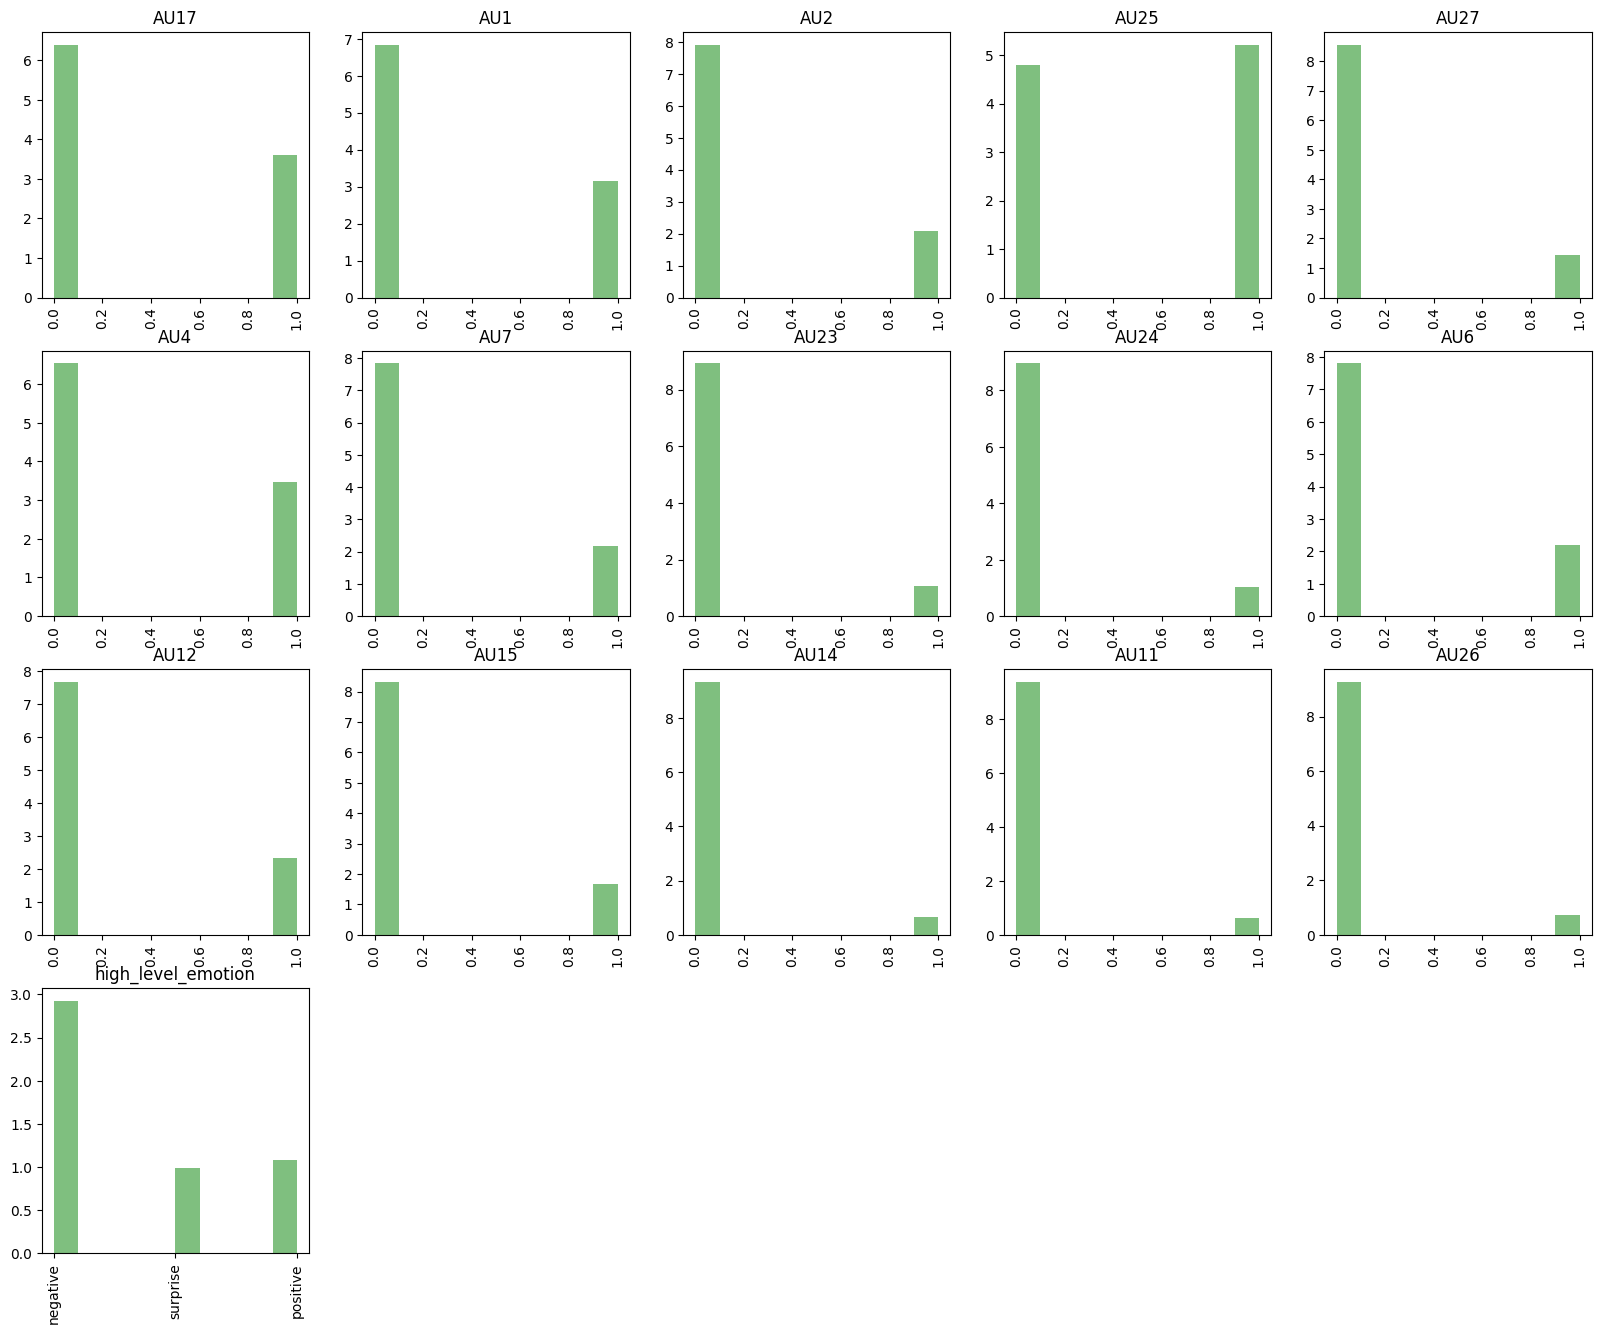

In [522]:
plt.figure(figsize=(20,20))
for i, col in enumerate(Face_df.columns[5:]):
    plt.subplot(5,5,i+1)
    plt.hist(Face_df[col], alpha=0.5, color='green', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')

We can see that the data is not balanced so accuracy of the model wont be a good metric base the model performance as it might support bias results. Using Evaluation metrics like precision, recall, F1 score, AUC would be better options to go with  

In [523]:
Face_df.subject.value_counts()

S130    10
S095     8
S125     8
S138     8
S102     8
        ..
S154     1
S151     1
S149     1
S148     1
S005     1
Name: subject, Length: 123, dtype: int64

Data contains images of the same subjects multiple times taking this into consideration before splitting as it increases the chances of data leakage

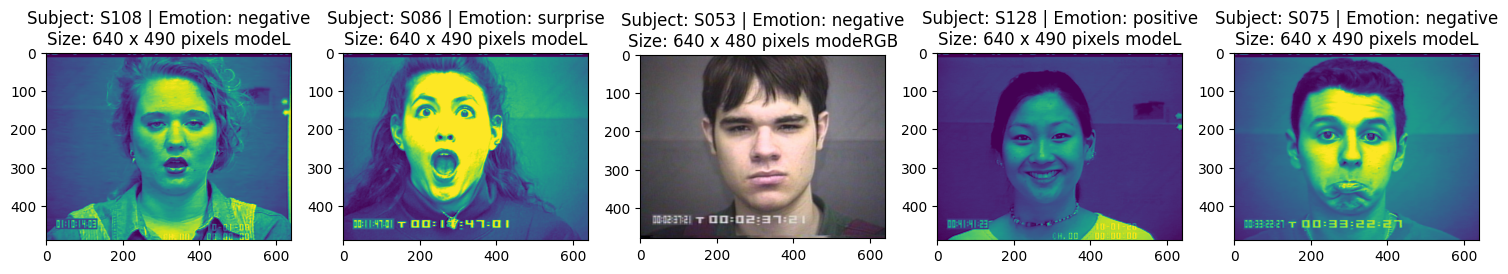

In [524]:
random_indices = random.sample(range(len(Face_df)), 5)
fig, axes = plt.subplots(1, 5, figsize=(15, 5))  # Adjust figsize as needed

for i, index in enumerate(random_indices):
    file_path = Face_df.loc[index, 'filepath']
    img = Image.open(file_path)
    image_width, image_height = img.size
    axes[i].imshow(img)
    title = f"Subject: {Face_df.loc[index, 'subject']} | Emotion: {Face_df.loc[index, 'high_level_emotion']}"
    subtitle = f"Size: {image_width} x {image_height} pixels mode{img.mode}"
    axes[i].set_title(title + '\n' + subtitle)
    #axes[i].set_title(title)
plt.tight_layout()
plt.show()

Displaying a random set of images from the data.
The images are of the size 640*490 pixels and they show the emotion of the subject.

Encoding the labels to numerical data

In [525]:
Face_df.columns

Index(['subject', 'sequence', 'image_index', 'filepath', 'file_prefix', 'AU17',
       'AU1', 'AU2', 'AU25', 'AU27', 'AU4', 'AU7', 'AU23', 'AU24', 'AU6',
       'AU12', 'AU15', 'AU14', 'AU11', 'AU26', 'high_level_emotion'],
      dtype='object')

## Splitting the Data
Ensuring that the images of same subject is not split into training validation and testing sets. Also shuffelling the data before setting them into the three sets.

Splitting the data such that same subjects are present in the same datasets

In [526]:
import pandas as pd
from sklearn.model_selection import train_test_split

subject_groups = Face_df.groupby('subject')
unique_subjects = Face_df['subject'].unique()
import random
random.shuffle(unique_subjects)
train_subjects, test_and_val_subjects = train_test_split(unique_subjects, train_size=0.7, random_state=42)
val_subjects, test_subjects = train_test_split(test_and_val_subjects, test_size=0.5, random_state=42)

train_indices = Face_df[Face_df['subject'].isin(train_subjects)].index.tolist()
val_indices = Face_df[Face_df['subject'].isin(val_subjects)].index.tolist()
test_indices = Face_df[Face_df['subject'].isin(test_subjects)].index.tolist()

train_df = Face_df.loc[train_indices]
val_df = Face_df.loc[val_indices]
test_df = Face_df.loc[test_indices]

In [527]:
train_df

,subject,sequence,image_index,filepath,file_prefix,AU17,AU1,AU2,AU25,AU27,...,AU7,AU23,AU24,AU6,AU12,AU15,AU14,AU11,AU26,high_level_emotion
0,S005,1,11,./cohn-kanade-images/S005/001/S005_001_0000001...,S005_001_00000011,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
1,S010,1,14,./cohn-kanade-images/S010/001/S010_001_0000001...,S010_001_00000014,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,negative
2,S010,2,14,./cohn-kanade-images/S010/002/S010_002_0000001...,S010_002_00000014,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,surprise
3,S010,3,18,./cohn-kanade-images/S010/003/S010_003_0000001...,S010_003_00000018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
4,S010,4,19,./cohn-kanade-images/S010/004/S010_004_0000001...,S010_004_00000019,1,0,0,0,0,...,1,1,1,0,0,0,0,0,0,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,S506,1,40,./cohn-kanade-images/S506/001/S506_001_0000004...,S506_001_00000040,1,0,0,0,0,...,1,1,0,1,0,0,0,0,0,negative
554,S506,2,9,./cohn-kanade-images/S506/002/S506_002_0000000...,S506_002_00000009,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,negative
555,S506,4,38,./cohn-kanade-images/S506/004/S506_004_0000003...,S506_004_00000038,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,negative
556,S506,6,42,./cohn-kanade-images/S506/006/S506_006_0000004...,S506_006_00000042,1,1,1,0,0,...,0,0,0,0,0,1,0,0,1,negative


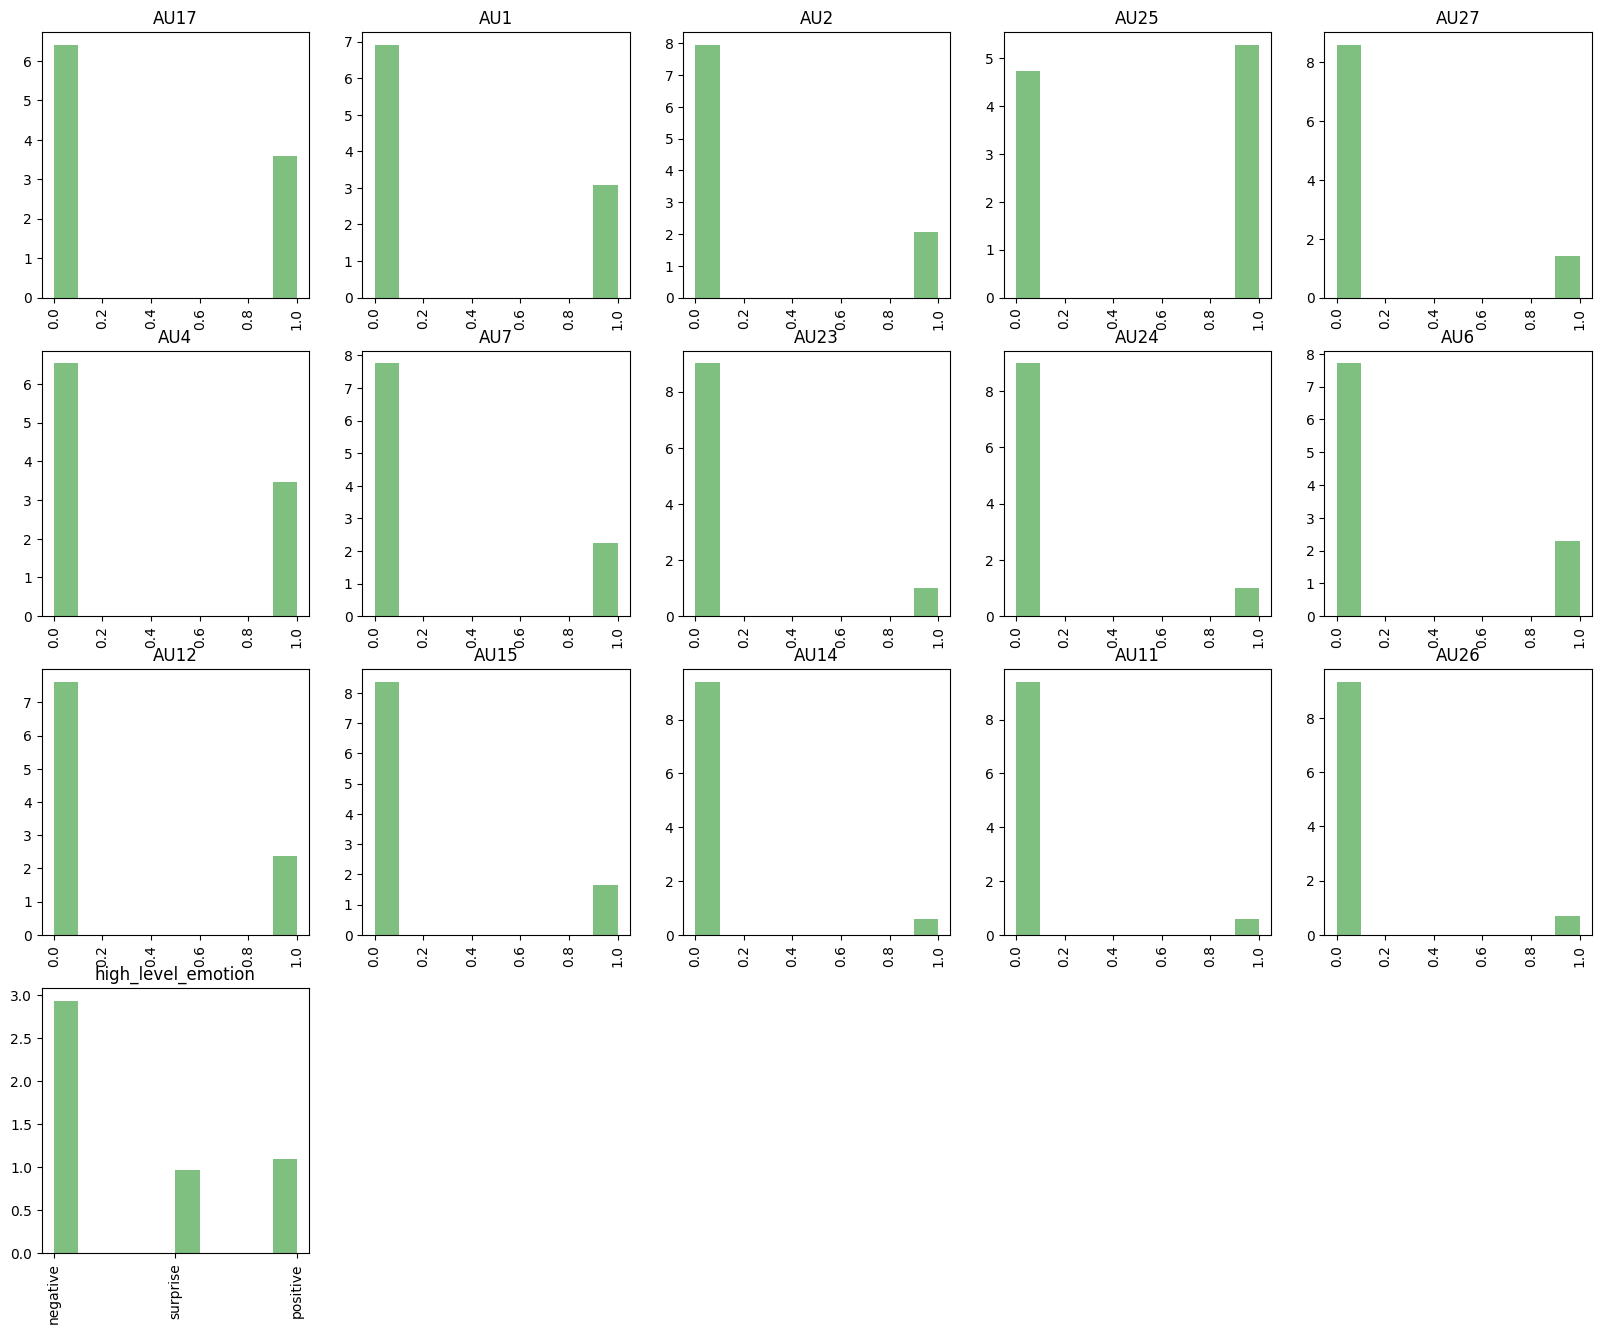

In [528]:
plt.figure(figsize=(20,20))
for i, col in enumerate(train_df.columns[5:]):
    plt.subplot(5,5,i+1)
    plt.hist(train_df[col], alpha=0.5, color='green', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')

In [529]:
val_df

,subject,sequence,image_index,filepath,file_prefix,AU17,AU1,AU2,AU25,AU27,...,AU7,AU23,AU24,AU6,AU12,AU15,AU14,AU11,AU26,high_level_emotion
24,S026,1,15,./cohn-kanade-images/S026/001/S026_001_0000001...,S026_001_00000015,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,surprise
25,S026,2,16,./cohn-kanade-images/S026/002/S026_002_0000001...,S026_002_00000016,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,negative
26,S026,3,15,./cohn-kanade-images/S026/003/S026_003_0000001...,S026_003_00000015,1,0,0,0,0,...,1,0,1,0,0,0,1,0,0,negative
27,S026,4,12,./cohn-kanade-images/S026/004/S026_004_0000001...,S026_004_00000012,1,0,0,0,0,...,1,0,0,1,0,1,0,0,0,negative
28,S026,5,14,./cohn-kanade-images/S026/005/S026_005_0000001...,S026_005_00000014,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,S147,2,13,./cohn-kanade-images/S147/002/S147_002_0000001...,S147_002_00000013,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,negative
533,S155,2,12,./cohn-kanade-images/S155/002/S155_002_0000001...,S155_002_00000012,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,negative
541,S502,1,16,./cohn-kanade-images/S502/001/S502_001_0000001...,S502_001_00000016,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,negative
542,S502,2,9,./cohn-kanade-images/S502/002/S502_002_0000000...,S502_002_00000009,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,negative


In [530]:
test_df

,subject,sequence,image_index,filepath,file_prefix,AU17,AU1,AU2,AU25,AU27,...,AU7,AU23,AU24,AU6,AU12,AU15,AU14,AU11,AU26,high_level_emotion
30,S028,1,24,./cohn-kanade-images/S028/001/S028_001_0000002...,S028_001_00000024,1,0,0,0,0,...,1,0,1,0,0,0,1,0,0,negative
31,S029,1,19,./cohn-kanade-images/S029/001/S029_001_0000001...,S029_001_00000019,1,0,0,0,0,...,1,1,0,1,0,0,0,0,0,negative
61,S044,1,24,./cohn-kanade-images/S044/001/S044_001_0000002...,S044_001_00000024,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,surprise
62,S044,2,18,./cohn-kanade-images/S044/002/S044_002_0000001...,S044_002_00000018,0,1,0,1,0,...,1,0,0,1,1,0,0,1,0,positive
63,S044,3,14,./cohn-kanade-images/S044/003/S044_003_0000001...,S044_003_00000014,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,S154,2,13,./cohn-kanade-images/S154/002/S154_002_0000001...,S154_002_00000013,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,negative
551,S505,2,21,./cohn-kanade-images/S505/002/S505_002_0000002...,S505_002_00000021,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,negative
552,S505,6,19,./cohn-kanade-images/S505/006/S505_006_0000001...,S505_006_00000019,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,negative
558,S999,1,18,./cohn-kanade-images/S999/001/S999_001_0000001...,S999_001_00000018,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,negative


Making sure that the data from the same subject is not present in multiple sets avoiding data leakage

In [531]:
train_subject_set = set(train_subjects)
val_subject_set = set(val_subjects)
test_subject_set = set(test_subjects)


train_val_intersection = train_subject_set.intersection(val_subject_set)
train_test_intersection = train_subject_set.intersection(test_subject_set)
val_test_intersection = val_subject_set.intersection(test_subject_set)

print("Subjects repeated between Train and Validation:", train_val_intersection)
print("Subjects repeated between Train and Test:", train_test_intersection)
print("Subjects repeated between Validation and Test:", val_test_intersection)

Subjects repeated between Train and Validation: set()
Subjects repeated between Train and Test: set()
Subjects repeated between Validation and Test: set()


Building a custom data loader to initialize the data

In [532]:
import tensorflow.keras as keras
from scipy.interpolate import interp1d
import numpy as np
from scipy.ndimage.interpolation import rotate, shift
from PIL import Image
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.preprocessing import LabelEncoder

class DataGenerator(keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, data_frame, batch_size=8, dim=(224, 224, 3), n_emoclasses=3, data_mean=0.0, data_std=1.0,  data_prefix='', shuffle=True, Augment=True):
        'Initialization'
        self.dim = dim  # Dimentions of the input
        self.batch_size = batch_size
        self.n_emoclasses = n_emoclasses  # Number of emotion level classes for the emotion classification

        self.shuffle = shuffle  # Flag to shuffle data at the end of epoch
        self.Augment = Augment  # Falg to augment the data

        # The data is input as a pandas dataframe, we need to read the relevent fields
        self.data_frame = data_frame
        self.label_encoder = LabelEncoder()
        self.label_encoder.fit(data_frame['high_level_emotion'])
        self.image_label_emote = self.label_encoder.transform(data_frame['high_level_emotion']).tolist()

        self.image_label_facs = data_frame.iloc[:, 5:-1].values
        self.image_ids = np.arange(len(self.image_label_emote)).tolist()
        self.data_prefix = data_prefix

        # Data normalization parameters
        self.data_mean = np.float32(data_mean)
        self.data_std = np.float32(data_std)

        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.image_ids) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data for the given index'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        data_ids_temp = [self.image_ids[k] for k in indexes]
        image_label_temp_emote = [self.image_label_emote[k] for k in indexes]
        image_labels_temp_facs = [self.image_label_facs[k] for k in indexes]

        # Generate data
        X, y_emote, y_facs = self.__data_generation(data_ids_temp, image_label_temp_emote, image_labels_temp_facs)

        return X, {'emotion': y_emote, 'au_scores': y_facs}

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.image_ids))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)


    def __data_generation(self, data_ids_temp, image_label_temp_emote,image_labels_temp_facs ):
        'Generates data containing batch_size samples'

        # Initialization
        X = np.empty((self.batch_size, *self.dim))
        y_emote = np.empty((self.batch_size), dtype=int)
        y_facs = np.empty((self.batch_size, image_labels_temp_facs[0].shape[0]))

        # Generate data
        for i, ids in enumerate(data_ids_temp):

            X[i,] = self.__read_data_instance(data_ids_temp[i])
            y_emote[i] = image_label_temp_emote[i]
            y_facs[i] = image_labels_temp_facs[i]

        return X, keras.utils.to_categorical(y_emote, num_classes=self.n_emoclasses), y_facs


    def __read_data_instance(self, pid):
      # Read an image
      filepath = self.data_prefix + self.data_frame.iloc[pid]['filepath']
      preprocess_input = tf.keras.applications.resnet50.preprocess_input
      data = Image.open(filepath)
      if data.mode == 'L':  # Convert grayscale images to RGB
        data = data.convert('RGB')
      data = data.resize((224,224))
      data = np.asarray(data)


      if self.Augment:
        data = tf.image.resize_with_crop_or_pad(data, 230, 230) # Add 6 pixels of padding
        data = tf.image.random_crop(data, size=[224, 224, 3])
        data = tf.image.random_flip_left_right(data)
        data = tf.image.random_brightness(data, max_delta=0.5)
      preprocess_input = tf.keras.applications.resnet50.preprocess_input
      data = preprocess_input(data)


      X = data

      # Input normalization
      X = (X - self.data_mean)/self.data_std
      return X

<ipython-input-532-2936cbcd6ea1>:4: DeprecationWarning: Please use `rotate` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  from scipy.ndimage.interpolation import rotate, shift
<ipython-input-532-2936cbcd6ea1>:4: DeprecationWarning: Please use `shift` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  from scipy.ndimage.interpolation import rotate, shift


In [533]:
batch_size = 32
n_emoclasses = 3
data_mean = 0.
data_std = 255.0
prefix=''
train_generator = DataGenerator(data_frame=train_df, batch_size=batch_size, dim=(224, 224, 3),
                                     n_emoclasses=n_emoclasses, data_mean=data_mean, data_std=data_std,
                                     data_prefix=prefix, shuffle=True, Augment=True)


val_generator = DataGenerator(data_frame=val_df, batch_size=batch_size, dim=(224, 224, 3),
                                   n_emoclasses=n_emoclasses, data_mean=data_mean, data_std=data_std,
                                   data_prefix=prefix, shuffle=False, Augment=False)

In [534]:
au_columns = ['AU17',
       'AU1', 'AU2', 'AU25', 'AU27', 'AU4', 'AU7', 'AU23', 'AU24', 'AU6',
       'AU12', 'AU15', 'AU14', 'AU11', 'AU26']

## Model 1.1 Baseline model
Resnet 50 model is selected as the baseline.
As referenced in the study Classification of Real and Fake Human Faces Using Deep Learning[1] ResNet 50 was best performing model amongst other models such as VGG 16, MobileNet,InceptionV3 models for facial image classification

In [535]:

IMG_SIZE = (224, 224)
IMG_SHAPE = IMG_SIZE + (3,)
base_model_res = tf.keras.applications.resnet50.ResNet50(input_shape = IMG_SHAPE,
    include_top=False,
    weights='imagenet',

)

In [536]:
base_model_res.trainable = False

In [537]:
inputs = tf.keras.Input(shape=IMG_SHAPE)
x = base_model_res(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)  # Regularize with dropout

# Separate output layers for AU scores and emotion
au_outputs = tf.keras.layers.Dense(len(au_columns), activation='sigmoid', name='au_scores')(x)
emotion_output = tf.keras.layers.Dense(3, activation='softmax', name='emotion')(x)

# List of output layers
output_layers = [au_outputs, emotion_output]

model_res = tf.keras.Model(inputs=inputs, outputs=output_layers)
model_res.summary()

Model: "model_33"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_43 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 resnet50 (Functional)          (None, 7, 7, 2048)   23587712    ['input_43[0][0]']               
                                                                                                  
 global_average_pooling2d_33 (G  (None, 2048)        0           ['resnet50[0][0]']               
 lobalAveragePooling2D)                                                                           
                                                                                           

In [538]:
import pathlib
import shutil
import tempfile
logdir = pathlib.Path(tempfile.mkdtemp())/"tensorboard_logs"
shutil.rmtree(logdir, ignore_errors=True)

# Load the TensorBoard notebook extension
%load_ext tensorboard

# Open an embedded TensorBoard viewer
%tensorboard --logdir {logdir}/models

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
2023-09-01 05:47:49.968435: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Address already in use
Port 6006 is in use by another program. Either identify and stop that program, or start the server with a different port.

In [539]:
m_histories = {}

def get_callbacks(name):
    logdir = "logs/" + name
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=f'models/{name}_best.h5', monitor='val_loss', save_best_only=True)
    tensorboard = tf.keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=1)
    return [early_stopping, model_checkpoint, tensorboard]

In [540]:
from tensorflow.keras.metrics import BinaryAccuracy, CategoricalAccuracy, Precision, Recall, AUC





precision = Precision()
recall = Recall()
auc = AUC()
emotion_precision = Precision()
emotion_recall = Recall()
emotion_auc = AUC()


metrics = {
    'au_scores': [BinaryAccuracy(), precision, recall, auc],
    'emotion': [CategoricalAccuracy(), emotion_precision, emotion_recall,emotion_auc]
}
losses = {
    'au_scores': 'binary_crossentropy',  # Binary cross-entropy for AU scores
    'emotion': 'categorical_crossentropy'  # Categorical cross-entropy for emotion
}

model_res.compile(optimizer='adam', loss=losses,
                  metrics=metrics)

epochs = 10
m_histories['baseModel'] = model_res.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    callbacks=get_callbacks('models/baseModel'),
    verbose=1
)



Epoch 1/10
12/12 [==============================] - 29s 2s/step - loss: 1.7208 - au_scores_loss: 0.6233 - emotion_loss: 1.0975 - au_scores_binary_accuracy: 0.6594 - au_scores_precision_124: 0.2394 - au_scores_recall_124: 0.2903 - au_scores_auc_124: 0.5373 - emotion_categorical_accuracy: 0.5182 - emotion_precision_125: 0.5141 - emotion_recall_125: 0.4271 - emotion_auc_125: 0.6628 - val_loss: 1.5170 - val_au_scores_loss: 0.4833 - val_emotion_loss: 1.0338 - val_au_scores_binary_accuracy: 0.7958 - val_au_scores_precision_124: 0.5469 - val_au_scores_recall_124: 0.1733 - val_au_scores_auc_124: 0.6615 - val_emotion_categorical_accuracy: 0.5781 - val_emotion_precision_125: 0.5781 - val_emotion_recall_125: 0.5781 - val_emotion_auc_125: 0.6791
Epoch 2/10
12/12 [==============================] - 17s 2s/step - loss: 1.5111 - au_scores_loss: 0.4884 - emotion_loss: 1.0227 - au_scores_binary_accuracy: 0.7918 - au_scores_precision_124: 0.5094 - au_scores_recall_124: 0.1121 - au_scores_auc_124: 0.6745 

In [541]:
from itertools import cycle
import matplotlib.pyplot as plt
import numpy as np

def plot_curve(history_hold, loss_metric='emotion_loss', acc_metric='emotion_categorical_accuracy', ylim=[0.0, 1.0]):
    cycol = cycle('bgrcmk')

    plt.figure(figsize=(15, 10))

    for name, item in history_hold.items():
        y_train_loss = item.history[loss_metric]
        y_val_loss = item.history['val_' + loss_metric]

        y_train_acc = item.history[acc_metric]
        y_val_acc = item.history['val_' + acc_metric]

        y_train_loss_auc = item.history['au_scores_loss']
        y_val_loss_auc = item.history['val_au_scores_loss']

        y_train_acc_auc = item.history['au_scores_binary_accuracy']
        y_val_acc_auc = item.history['val_au_scores_binary_accuracy']

        x_train = np.arange(0, len(y_val_loss))

        c = next(cycol)

        plt.subplot(2, 2, 1)
        plt.plot(x_train, y_train_loss, c + '-', label=name + '_train')
        plt.plot(x_train, y_val_loss, c + '--', label=name + '_val')
        plt.xlabel('Epoch')
        plt.ylabel(loss_metric)
        plt.title('Loss Curve')

        plt.subplot(2, 2, 2)
        plt.plot(x_train, y_train_acc, c + '-', label=name + '_train')
        plt.plot(x_train, y_val_acc, c + '--', label=name + '_val')
        plt.xlabel('Epoch')
        plt.ylabel(acc_metric)
        plt.title('Accuracy Curve')

        plt.subplot(2, 2, 3)
        plt.plot(x_train, y_train_loss_auc, c + '-', label=name + '_train')
        plt.plot(x_train, y_val_loss_auc, c + '--', label=name + '_val')
        plt.xlabel('Epoch')
        plt.ylabel('AU loss')
        plt.title('AU Loss Curve')

        plt.subplot(2, 2, 4)
        plt.plot(x_train, y_train_acc_auc, c + '-', label=name + '_train')
        plt.plot(x_train, y_val_acc_auc, c + '--', label=name + '_val')
        plt.xlabel('Epoch')
        plt.ylabel('AU accuracy')
        plt.title('AU Accuracy Curve')

    plt.legend()
    plt.tight_layout()
    plt.show()




In [542]:
#function to print single curve
def plot_single_curve(history, loss_metric='emotion_loss', acc_metric='emotion_categorical_accuracy', ylim=[0.0, 1.0]):
    plt.figure(figsize=(15, 10))

    y_train_loss = history.history[loss_metric]
    y_val_loss = history.history['val_' + loss_metric]

    y_train_acc = history.history[acc_metric]
    y_val_acc = history.history['val_' + acc_metric]

    x_train = np.arange(0, len(y_val_loss))

    plt.subplot(1, 2, 1)
    plt.plot(x_train, y_train_loss, 'b-', label='train')
    plt.plot(x_train, y_val_loss, 'b--', label='val')
    plt.legend()
    plt.xlim([1, max(plt.xlim())])
    plt.ylim(ylim)
    plt.xlabel('Epoch')
    plt.ylabel(loss_metric)
    plt.title('Loss Curve')

    plt.subplot(1, 2, 2)
    plt.plot(x_train, y_train_acc, 'r-', label='train')
    plt.plot(x_train, y_val_acc, 'r--', label='val')
    plt.legend()
    plt.xlim([1, max(plt.xlim())])
    plt.ylim(ylim)
    plt.xlabel('Epoch')
    plt.ylabel(acc_metric)
    plt.title('Accuracy Curve')

    plt.tight_layout()
    plt.show()








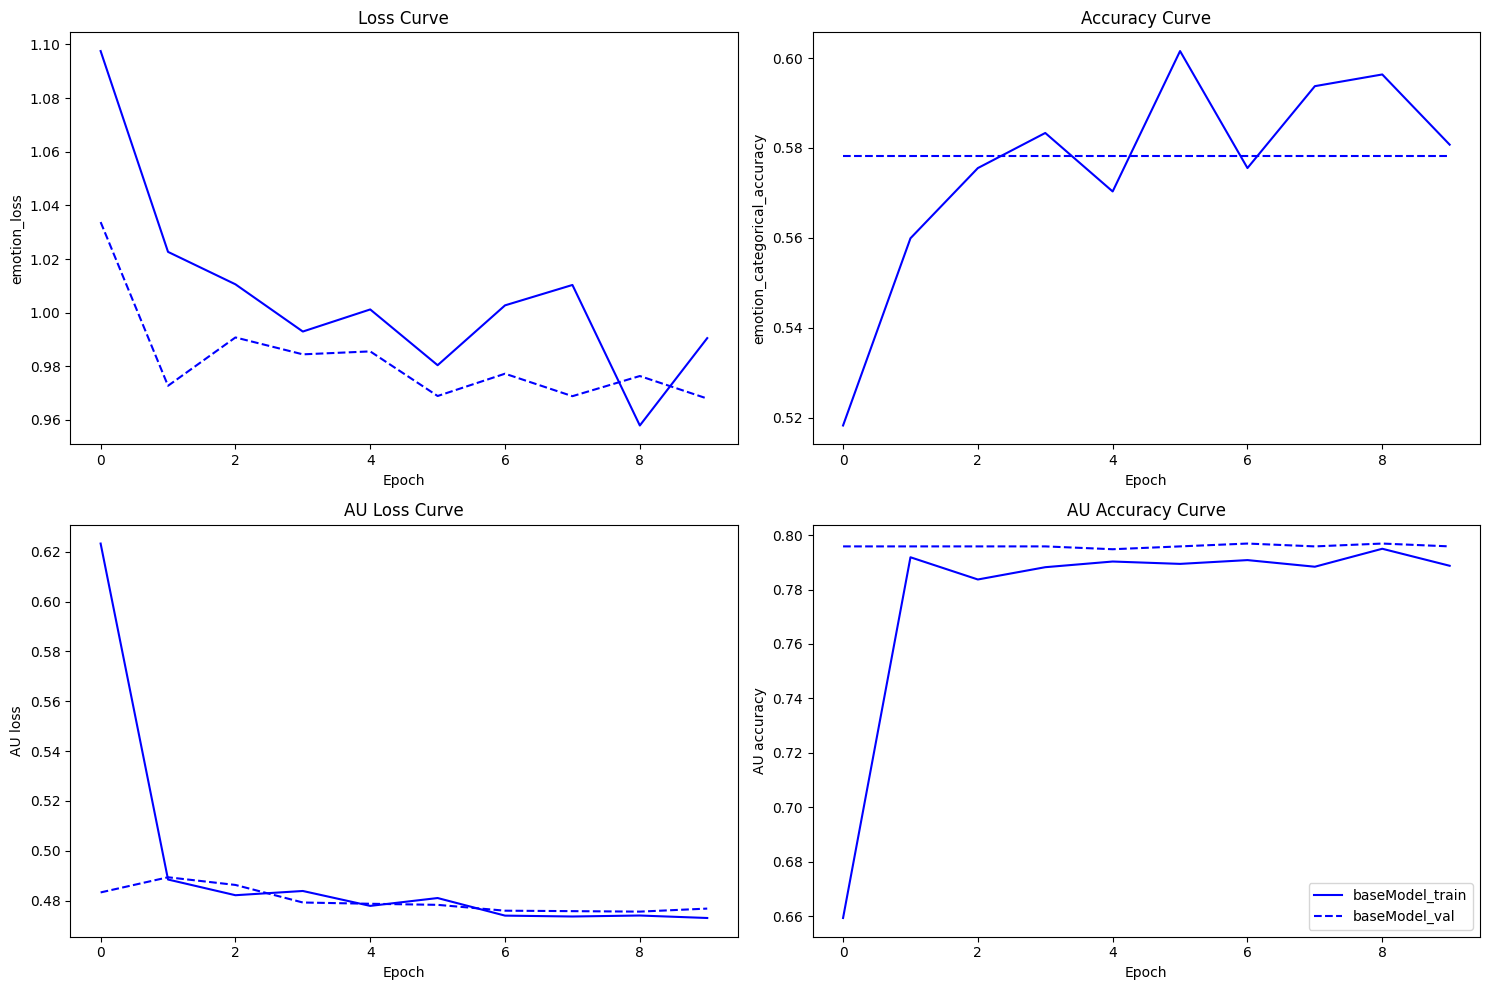

In [543]:
plot_curve(m_histories, loss_metric='emotion_loss', acc_metric='emotion_categorical_accuracy', ylim=[0.0, 1.0])

### Result


*   Model able to predict the classes but with a huge loss on the emotion data
*  As the data in the data is imbalanced introducing class weights to improve the model




##Model 1.2 Baseline model using class weights

Computing Class weights as the data is imbalanced for both AU labels and emotion class

In [544]:
from sklearn.utils.class_weight import compute_class_weight

class_labels = train_df['high_level_emotion']
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(class_labels), y=class_labels)

In [545]:
au_class_weights = {}
for label in au_columns:
    au_labels = train_df[label]
    au_class_weights[label] = compute_class_weight(class_weight='balanced', classes=[0, 1], y=au_labels)

In [546]:
np.unique(class_labels)

array(['negative', 'positive', 'surprise'], dtype=object)

In [547]:
from tensorflow.keras.metrics import BinaryAccuracy, CategoricalAccuracy, Precision, Recall, AUC


precision = Precision()
recall = Recall()
auc = AUC()
emotion_precision = Precision()
emotion_recall = Recall()
emotion_auc = AUC()


metrics = {
    'au_scores': [BinaryAccuracy(), precision, recall, auc],
    'emotion': [CategoricalAccuracy(), emotion_precision, emotion_recall,emotion_auc]
}
losses = {
    'au_scores': 'binary_crossentropy',
    'emotion': 'categorical_crossentropy'
}

model_res.compile(optimizer='adam', loss=losses,
                  loss_weights={'emotion': class_weights, 'au_scores': au_class_weights},
                  metrics=metrics)

epochs = 10
m_histories['baseModel_added_weights'] = model_res.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    callbacks=get_callbacks('models/baseModel_added_weights'),
    verbose=1
)


Epoch 1/10
12/12 [==============================] - 26s 2s/step - loss: 4.9204 - au_scores_loss: 0.4733 - emotion_loss: 0.9886 - au_scores_binary_accuracy: 0.7957 - au_scores_precision_126: 0.5519 - au_scores_recall_126: 0.1106 - au_scores_auc_126: 0.6978 - emotion_categorical_accuracy: 0.5781 - emotion_precision_127: 0.6037 - emotion_recall_127: 0.5078 - emotion_auc_127: 0.6984 - val_loss: 4.9000 - val_au_scores_loss: 0.4787 - val_emotion_loss: 0.9825 - val_au_scores_binary_accuracy: 0.7958 - val_au_scores_precision_126: 0.5469 - val_au_scores_recall_126: 0.1733 - val_au_scores_auc_126: 0.6901 - val_emotion_categorical_accuracy: 0.5781 - val_emotion_precision_127: 0.5781 - val_emotion_recall_127: 0.5781 - val_emotion_auc_127: 0.7092
Epoch 2/10
12/12 [==============================] - 17s 1s/step - loss: 4.8592 - au_scores_loss: 0.4782 - emotion_loss: 0.9734 - au_scores_binary_accuracy: 0.7925 - au_scores_precision_126: 0.5163 - au_scores_recall_126: 0.1443 - au_scores_auc_126: 0.6912 

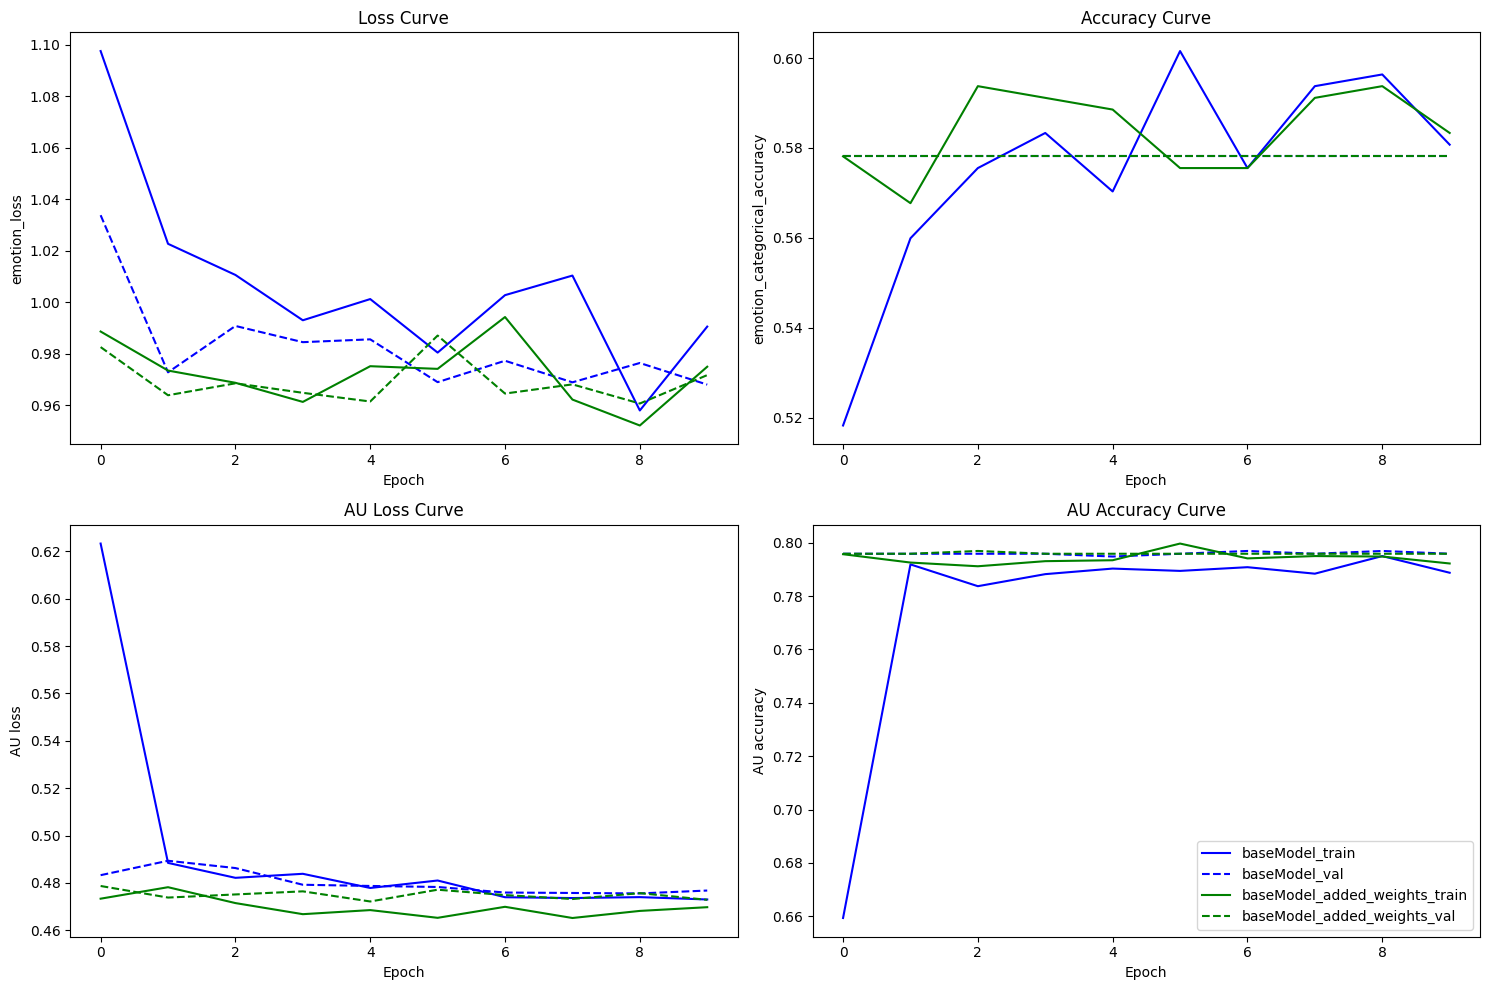

In [548]:
plot_curve(m_histories, loss_metric='emotion_loss', acc_metric='emotion_categorical_accuracy', ylim=[0.0, 1.0])

## Result


*   Model performed better then the previous model in terms of loss
*   The graph still looks as the validation loss is unstable, lets try reducing the learning rate of the model as most models perform better with decaying learning rate



## Model 1.3 Using lower learning rate

In [549]:
from tensorflow.keras.metrics import BinaryAccuracy, CategoricalAccuracy, Precision, Recall, AUC
from tensorflow.keras.callbacks import ModelCheckpoint


precision = Precision()
recall = Recall()
auc = AUC()
emotion_precision = Precision()
emotion_recall = Recall()
emotion_auc = AUC()


learning_rate = 0.01

lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    learning_rate, decay_steps=1000, decay_rate=1, staircase=True
)

metrics = {
    'au_scores': [BinaryAccuracy(), precision, recall, auc],
    'emotion': [CategoricalAccuracy(), emotion_precision, emotion_recall,emotion_auc]
}
losses = {
    'au_scores': 'binary_crossentropy',
    'emotion': 'categorical_crossentropy'
}

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model_res.compile(optimizer=optimizer, loss=losses,
                  loss_weights={'emotion': class_weights, 'au_scores': au_class_weights},
                  metrics=metrics)

epochs = 10
m_histories['baseModel_lr'] = model_res.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    callbacks=get_callbacks('models/baseModel_lr'),
    verbose=1
)

Epoch 1/10
12/12 [==============================] - 26s 2s/step - loss: 7.3322 - au_scores_loss: 0.5407 - emotion_loss: 1.5169 - au_scores_binary_accuracy: 0.7693 - au_scores_precision_128: 0.4097 - au_scores_recall_128: 0.2168 - au_scores_auc_128: 0.6609 - emotion_categorical_accuracy: 0.5182 - emotion_precision_129: 0.5160 - emotion_recall_129: 0.5026 - emotion_auc_129: 0.6633 - val_loss: 5.6917 - val_au_scores_loss: 0.5262 - val_emotion_loss: 1.1492 - val_au_scores_binary_accuracy: 0.7698 - val_au_scores_precision_128: 0.4144 - val_au_scores_recall_128: 0.2277 - val_au_scores_auc_128: 0.6527 - val_emotion_categorical_accuracy: 0.2812 - val_emotion_precision_129: 0.0000e+00 - val_emotion_recall_129: 0.0000e+00 - val_emotion_auc_129: 0.3864
Epoch 2/10
12/12 [==============================] - 17s 1s/step - loss: 6.5678 - au_scores_loss: 0.5138 - emotion_loss: 1.3509 - au_scores_binary_accuracy: 0.7743 - au_scores_precision_128: 0.4019 - au_scores_recall_128: 0.1781 - au_scores_auc_128:

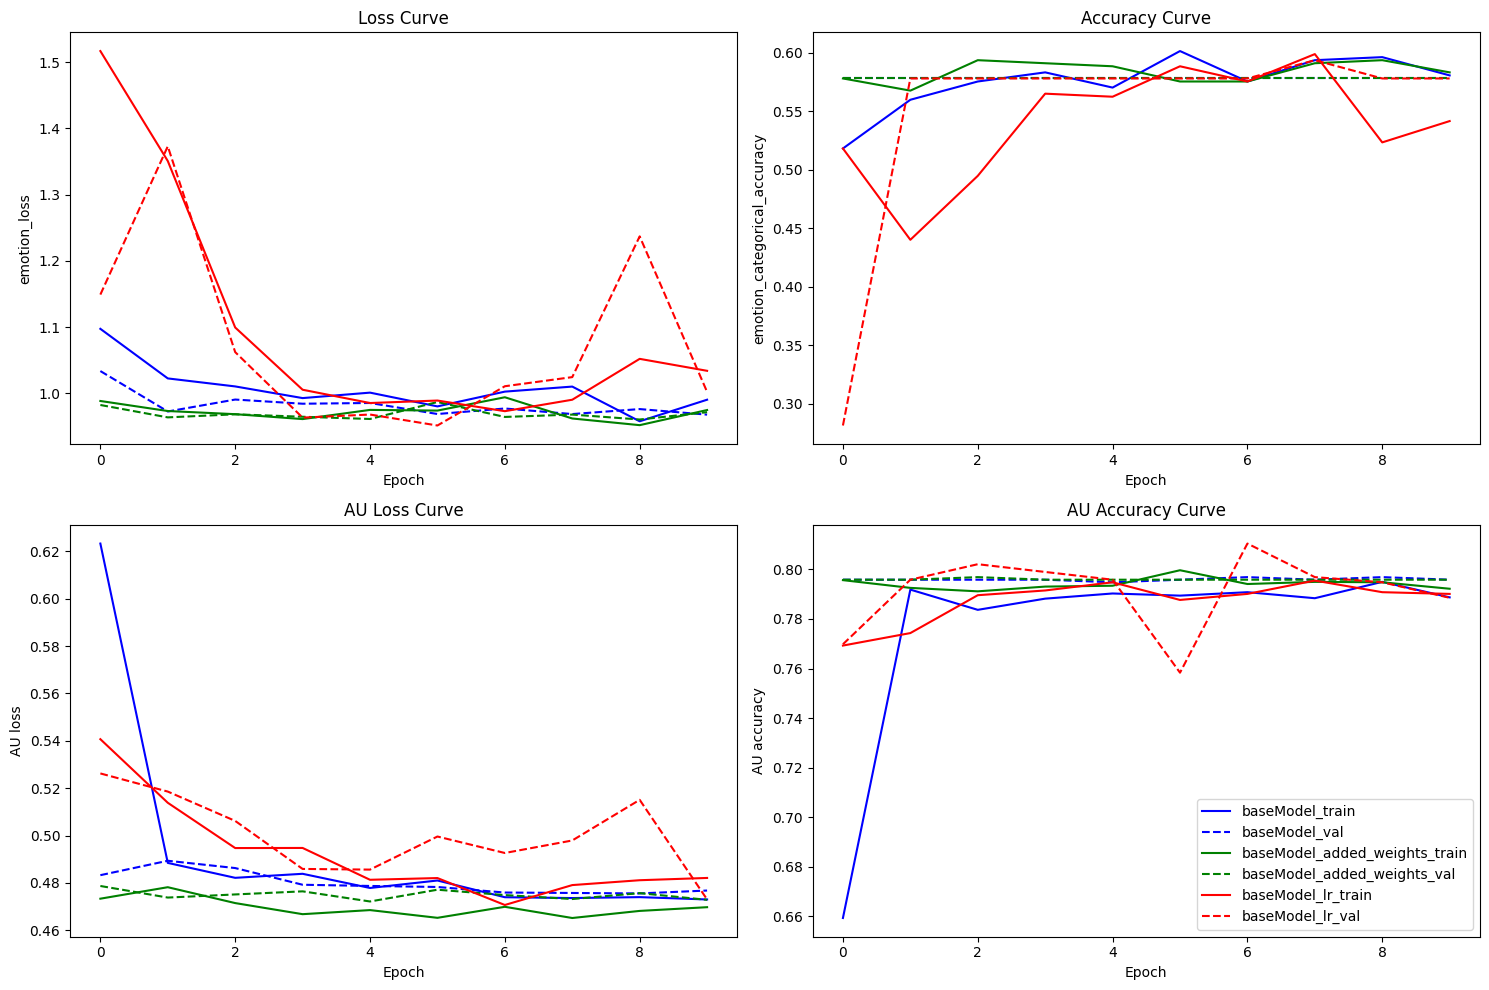

In [550]:
plot_curve(m_histories, loss_metric='emotion_loss', acc_metric='emotion_categorical_accuracy', ylim=[0.0, 1.0])

In [551]:


evaluation_results = model_res.evaluate(val_generator)


au_scores_loss = evaluation_results[1]
emotion_loss = evaluation_results[2]
au_scores_binary_accuracy = evaluation_results[3]
au_scores_precision = evaluation_results[4]
au_scores_recall = evaluation_results[5]
au_scores_auc = evaluation_results[6]
emotion_categorical_accuracy = evaluation_results[7]
emotion_precision = evaluation_results[8]  # Add precision for emotion
emotion_recall = evaluation_results[9]  # Add recall for emotion
emotion_auc = evaluation_results[10]  # Add AUC for emotion
f1_score = 2 * (au_scores_precision * au_scores_recall) / (au_scores_precision + au_scores_recall)
emotion_f1_score = 2 * (emotion_precision * emotion_recall) / (emotion_precision + emotion_recall)


print(f"AU Scores Loss: {au_scores_loss:.4f}")
print(f"AU Scores Binary Accuracy: {au_scores_binary_accuracy:.4f}")
print(f"AU Scores Precision: {au_scores_precision:.4f}")
print(f"AU Scores Recall: {au_scores_recall:.4f}")
print(f"AU Scores AUC: {au_scores_auc:.4f}")
print(f"AU Scores F1 score: {f1_score:.4f}")

print(f"Emotion Loss: {emotion_loss:.4f}")
print(f"Emotion Categorical Accuracy: {emotion_categorical_accuracy:.4f}")
print(f"Emotion Precision: {emotion_precision:.4f}")
print(f"Emotion Recall: {emotion_recall:.4f}")
print(f"Emotion AUC: {emotion_auc:.4f}")
print(f"Emotion F1 score: {emotion_f1_score:.4f}")

2/2 [==============================] - 1s 551ms/step - loss: 4.9808 - au_scores_loss: 0.4730 - emotion_loss: 1.0023 - au_scores_binary_accuracy: 0.7885 - au_scores_precision_128: 0.4943 - au_scores_recall_128: 0.2129 - au_scores_auc_128: 0.7048 - emotion_categorical_accuracy: 0.5781 - emotion_precision_129: 0.5781 - emotion_recall_129: 0.5781 - emotion_auc_129: 0.7524
AU Scores Loss: 0.4730
AU Scores Binary Accuracy: 0.7885
AU Scores Precision: 0.4943
AU Scores Recall: 0.2129
AU Scores AUC: 0.7048
AU Scores F1 score: 0.2976
Emotion Loss: 1.0023
Emotion Categorical Accuracy: 0.5781
Emotion Precision: 0.5781
Emotion Recall: 0.5781
Emotion AUC: 0.7524
Emotion F1 score: 0.5781


##Result
 * with changes in the learning rate the model was improving for the AU Scores before the early stopping occured.
 * The model output still seems unstable lets try using the RMSprop optimizer to see if it stabilizes the output

## Model 1.4 Basemodel with RMSprop

In [552]:
from tensorflow.keras.metrics import BinaryAccuracy, CategoricalAccuracy, Precision, Recall, AUC
from tensorflow.keras.callbacks import ModelCheckpoint


precision = Precision()
recall = Recall()
auc = AUC()
emotion_precision = Precision()
emotion_recall = Recall()
emotion_auc = AUC()


learning_rate = 0.01

lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    learning_rate, decay_steps=1000, decay_rate=1, staircase=True
)

metrics = {
    'au_scores': [BinaryAccuracy(), precision, recall, auc],
    'emotion': [CategoricalAccuracy(), emotion_precision, emotion_recall,emotion_auc]
}
losses = {
    'au_scores': 'binary_crossentropy',
    'emotion': 'categorical_crossentropy'
}

optimizer = tf.keras.optimizers.RMSprop(learning_rate=lr_schedule)

model_res.compile(optimizer=optimizer, loss=losses,
                  loss_weights={'emotion': class_weights, 'au_scores': au_class_weights},
                  metrics=metrics)

epochs = 10
m_histories['baseModel_rms'] = model_res.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    callbacks=get_callbacks('models/baseModel_rms'),
    verbose=1
)

Epoch 1/10
12/12 [==============================] - 25s 2s/step - loss: 12.7227 - au_scores_loss: 0.7071 - emotion_loss: 2.6934 - au_scores_binary_accuracy: 0.7288 - au_scores_precision_130: 0.3125 - au_scores_recall_130: 0.2442 - au_scores_auc_130: 0.6267 - emotion_categorical_accuracy: 0.3880 - emotion_precision_131: 0.3920 - emotion_recall_131: 0.3828 - emotion_auc_131: 0.5586 - val_loss: 5.8541 - val_au_scores_loss: 0.5815 - val_emotion_loss: 1.1713 - val_au_scores_binary_accuracy: 0.7896 - val_au_scores_precision_130: 0.0000e+00 - val_au_scores_recall_130: 0.0000e+00 - val_au_scores_auc_130: 0.6525 - val_emotion_categorical_accuracy: 0.5938 - val_emotion_precision_131: 0.6034 - val_emotion_recall_131: 0.5469 - val_emotion_auc_131: 0.7175
Epoch 2/10
12/12 [==============================] - 17s 1s/step - loss: 5.9597 - au_scores_loss: 0.5462 - emotion_loss: 1.2046 - au_scores_binary_accuracy: 0.7675 - au_scores_precision_130: 0.4026 - au_scores_recall_130: 0.2071 - au_scores_auc_130

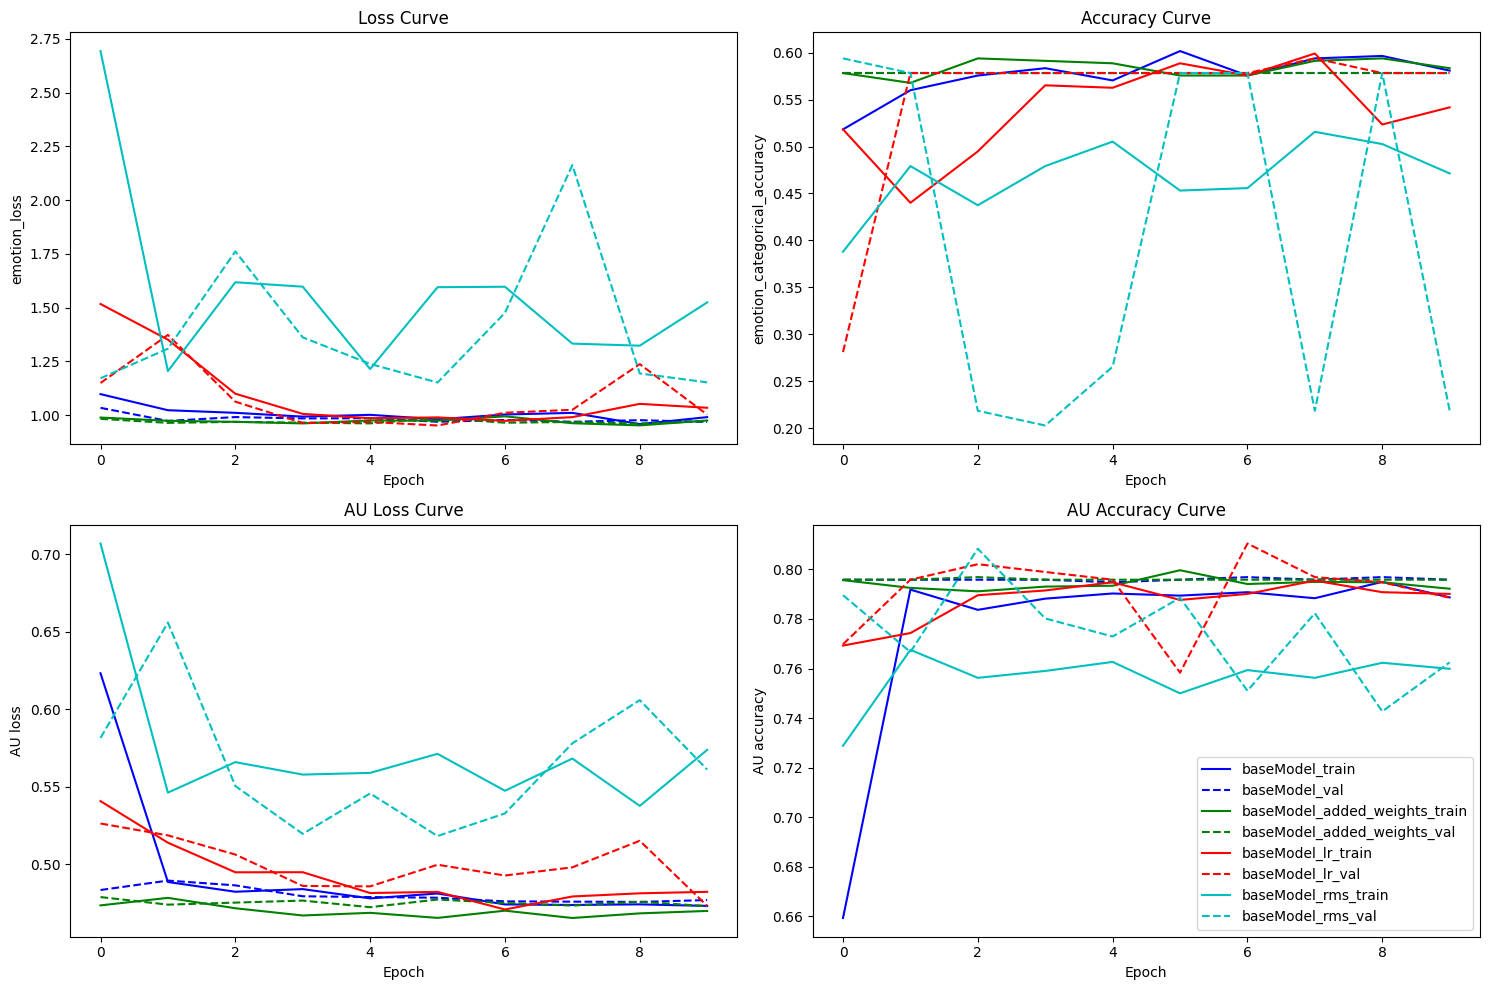

In [553]:
plot_curve(m_histories, loss_metric='emotion_loss', acc_metric='emotion_categorical_accuracy', ylim=[0.0, 1.0])

###Result


*   The model does performed worse in comparison with the adam optimizer so sticking with the adam optimizer
*   lets increase the batch size and see as larger batch size can lead to a more stable gradient estimate.



## Model 1.5 Basemodel with bigger batch size

In [554]:
batch_size = 64
n_emoclasses = 3
data_mean = 0.
data_std = 255.0
prefix=''
train_generator_b = DataGenerator(data_frame=train_df, batch_size=batch_size, dim=(224, 224, 3),
                                     n_emoclasses=n_emoclasses, data_mean=data_mean, data_std=data_std,
                                     data_prefix=prefix, shuffle=True, Augment=True)


val_generator_b = DataGenerator(data_frame=val_df, batch_size=batch_size, dim=(224, 224, 3),
                                   n_emoclasses=n_emoclasses, data_mean=data_mean, data_std=data_std,
                                   data_prefix=prefix, shuffle=False, Augment=False)

In [555]:
from tensorflow.keras.metrics import BinaryAccuracy, CategoricalAccuracy, Precision, Recall, AUC
from tensorflow.keras.callbacks import ModelCheckpoint


precision = Precision()
recall = Recall()
auc = AUC()
emotion_precision = Precision()
emotion_recall = Recall()
emotion_auc = AUC()


learning_rate = 0.01

lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    learning_rate, decay_steps=1000, decay_rate=1, staircase=True
)

metrics = {
    'au_scores': [BinaryAccuracy(), precision, recall, auc],
    'emotion': [CategoricalAccuracy(), emotion_precision, emotion_recall,emotion_auc]
}
losses = {
    'au_scores': 'binary_crossentropy',
    'emotion': 'categorical_crossentropy'
}

optimizer = tf.keras.optimizers.RMSprop(learning_rate=lr_schedule)

model_res.compile(optimizer=optimizer, loss=losses,
                  loss_weights={'emotion': class_weights, 'au_scores': au_class_weights},
                  metrics=metrics)

epochs = 10
m_histories['baseModel_bb'] = model_res.fit(
    train_generator_b,
    epochs=epochs,
    validation_data=val_generator_b,
    callbacks=get_callbacks('models/baseModel_bb'),
    verbose=1
)

Epoch 1/10
6/6 [==============================] - 27s 4s/step - loss: 14.5920 - au_scores_loss: 0.8974 - emotion_loss: 3.0662 - au_scores_binary_accuracy: 0.7099 - au_scores_precision_132: 0.2906 - au_scores_recall_132: 0.2749 - au_scores_auc_132: 0.6134 - emotion_categorical_accuracy: 0.3854 - emotion_precision_133: 0.3912 - emotion_recall_133: 0.3464 - emotion_auc_133: 0.5885 - val_loss: 7.9105 - val_au_scores_loss: 0.5244 - val_emotion_loss: 1.6521 - val_au_scores_binary_accuracy: 0.7958 - val_au_scores_precision_132: 0.5469 - val_au_scores_recall_132: 0.1733 - val_au_scores_auc_132: 0.6882 - val_emotion_categorical_accuracy: 0.2969 - val_emotion_precision_133: 0.3065 - val_emotion_recall_133: 0.2969 - val_emotion_auc_133: 0.5388
Epoch 2/10
6/6 [==============================] - 17s 3s/step - loss: 7.4416 - au_scores_loss: 0.5540 - emotion_loss: 1.5381 - au_scores_binary_accuracy: 0.7625 - au_scores_precision_132: 0.3663 - au_scores_recall_132: 0.1775 - au_scores_auc_132: 0.6468 - e

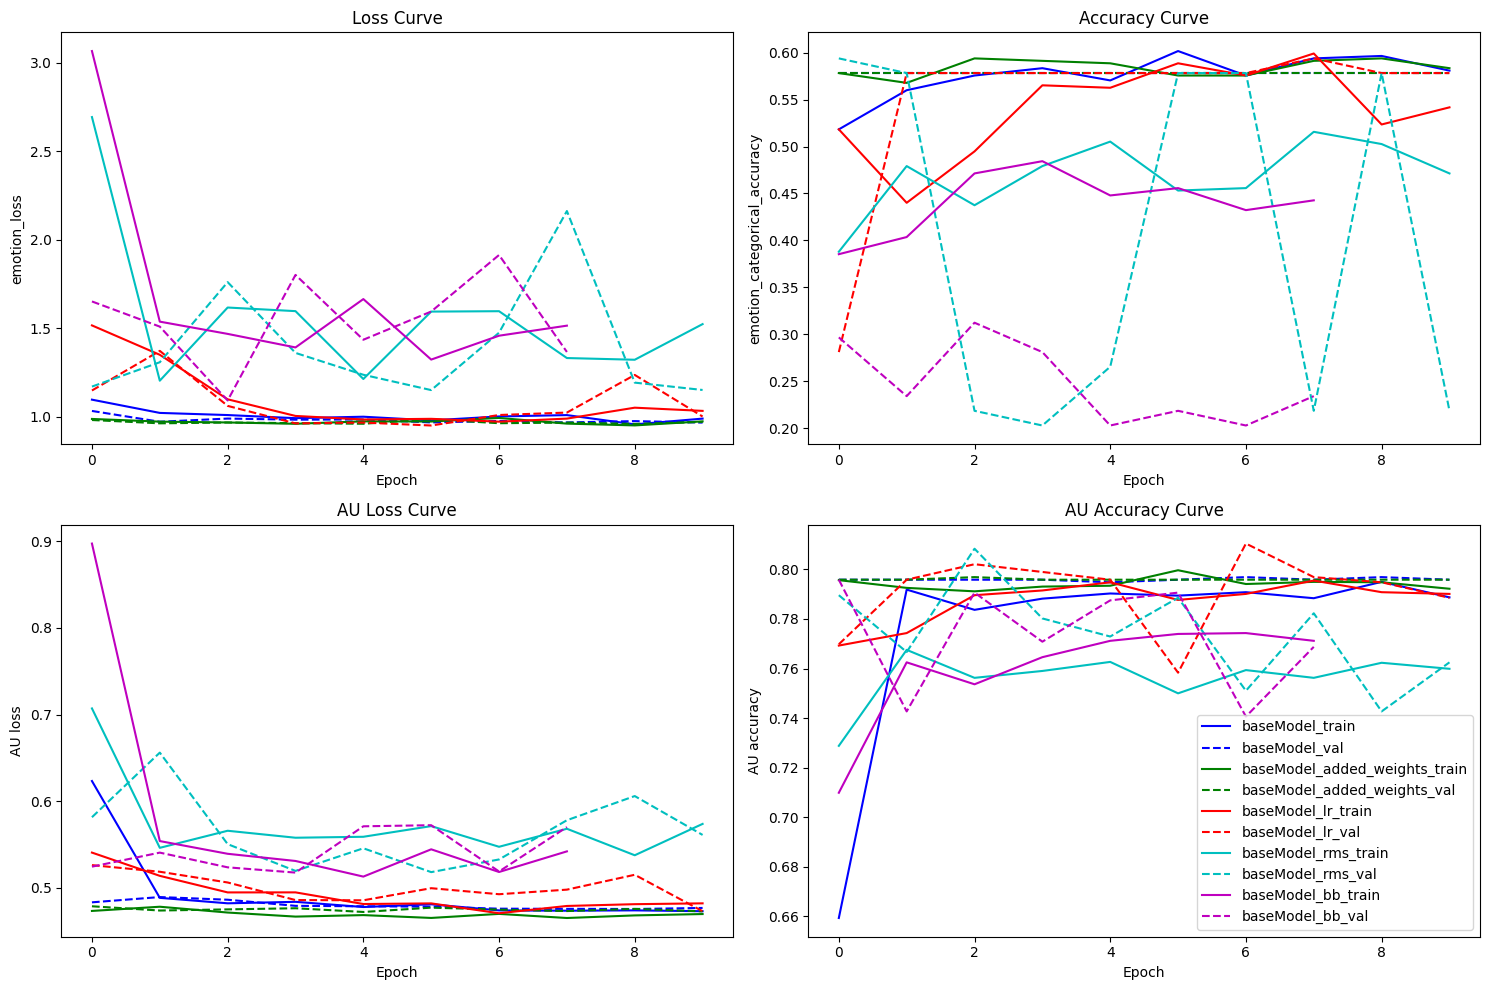

In [556]:
plot_curve(m_histories, loss_metric='emotion_loss', acc_metric='emotion_categorical_accuracy', ylim=[0.0, 1.0])

## Result
* The model performed worse with a bigger batch size so sticking with the batch size at 32
* Adding in a dense layer to increase the complexity so that it can capture more features.

## Model 1.6 Adding Dense layer


In [557]:
from tensorflow.keras.regularizers import l2


inputs = tf.keras.Input(shape=IMG_SHAPE)
x = base_model_res(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)  # Regularize with dropout

# Separate output layers for AU scores and emotion
au_outputs = tf.keras.layers.Dense(len(au_columns), activation='sigmoid', name='au_scores')(x)
emotion_output = tf.keras.layers.Dense(3, activation='softmax', name='emotion')(x)

# List of output layers
output_layers = [au_outputs, emotion_output]

model_res_d = tf.keras.Model(inputs=inputs, outputs=output_layers)
model_res_d.summary()

Model: "model_34"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_44 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 resnet50 (Functional)          (None, 7, 7, 2048)   23587712    ['input_44[0][0]']               
                                                                                                  
 global_average_pooling2d_34 (G  (None, 2048)        0           ['resnet50[1][0]']               
 lobalAveragePooling2D)                                                                           
                                                                                           

In [558]:
from tensorflow.keras.metrics import BinaryAccuracy, CategoricalAccuracy, Precision, Recall, AUC
from tensorflow.keras.callbacks import ModelCheckpoint


precision = Precision()
recall = Recall()
auc = AUC()
emotion_precision = Precision()
emotion_recall = Recall()
emotion_auc = AUC()


learning_rate = 0.01

lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    learning_rate, decay_steps=1000, decay_rate=1, staircase=True
)

metrics = {
    'au_scores': [BinaryAccuracy(), precision, recall, auc],
    'emotion': [CategoricalAccuracy(), emotion_precision, emotion_recall,emotion_auc]
}
losses = {
    'au_scores': 'binary_crossentropy',
    'emotion': 'categorical_crossentropy'
}

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model_res_d.compile(optimizer=optimizer, loss=losses,
                  loss_weights={'emotion': class_weights, 'au_scores': au_class_weights},
                  metrics=metrics)

epochs = 10
m_histories['Model_layer'] = model_res_d.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    callbacks=get_callbacks('models/Model_layer'),
    verbose=1
)

Epoch 1/10
12/12 [==============================] - 26s 2s/step - loss: 7.4637 - au_scores_loss: 0.6235 - emotion_loss: 1.5247 - au_scores_binary_accuracy: 0.6976 - au_scores_precision_134: 0.2882 - au_scores_recall_134: 0.3088 - au_scores_auc_134: 0.5710 - emotion_categorical_accuracy: 0.5130 - emotion_precision_135: 0.5104 - emotion_recall_135: 0.3828 - emotion_auc_135: 0.6564 - val_loss: 5.1123 - val_au_scores_loss: 0.5794 - val_emotion_loss: 1.0039 - val_au_scores_binary_accuracy: 0.7437 - val_au_scores_precision_134: 0.3854 - val_au_scores_recall_134: 0.3663 - val_au_scores_auc_134: 0.6223 - val_emotion_categorical_accuracy: 0.5781 - val_emotion_precision_135: 0.0000e+00 - val_emotion_recall_135: 0.0000e+00 - val_emotion_auc_135: 0.6966
Epoch 2/10
12/12 [==============================] - 17s 1s/step - loss: 5.0065 - au_scores_loss: 0.5266 - emotion_loss: 0.9939 - au_scores_binary_accuracy: 0.7790 - au_scores_precision_134: 0.4258 - au_scores_recall_134: 0.1848 - au_scores_auc_134:

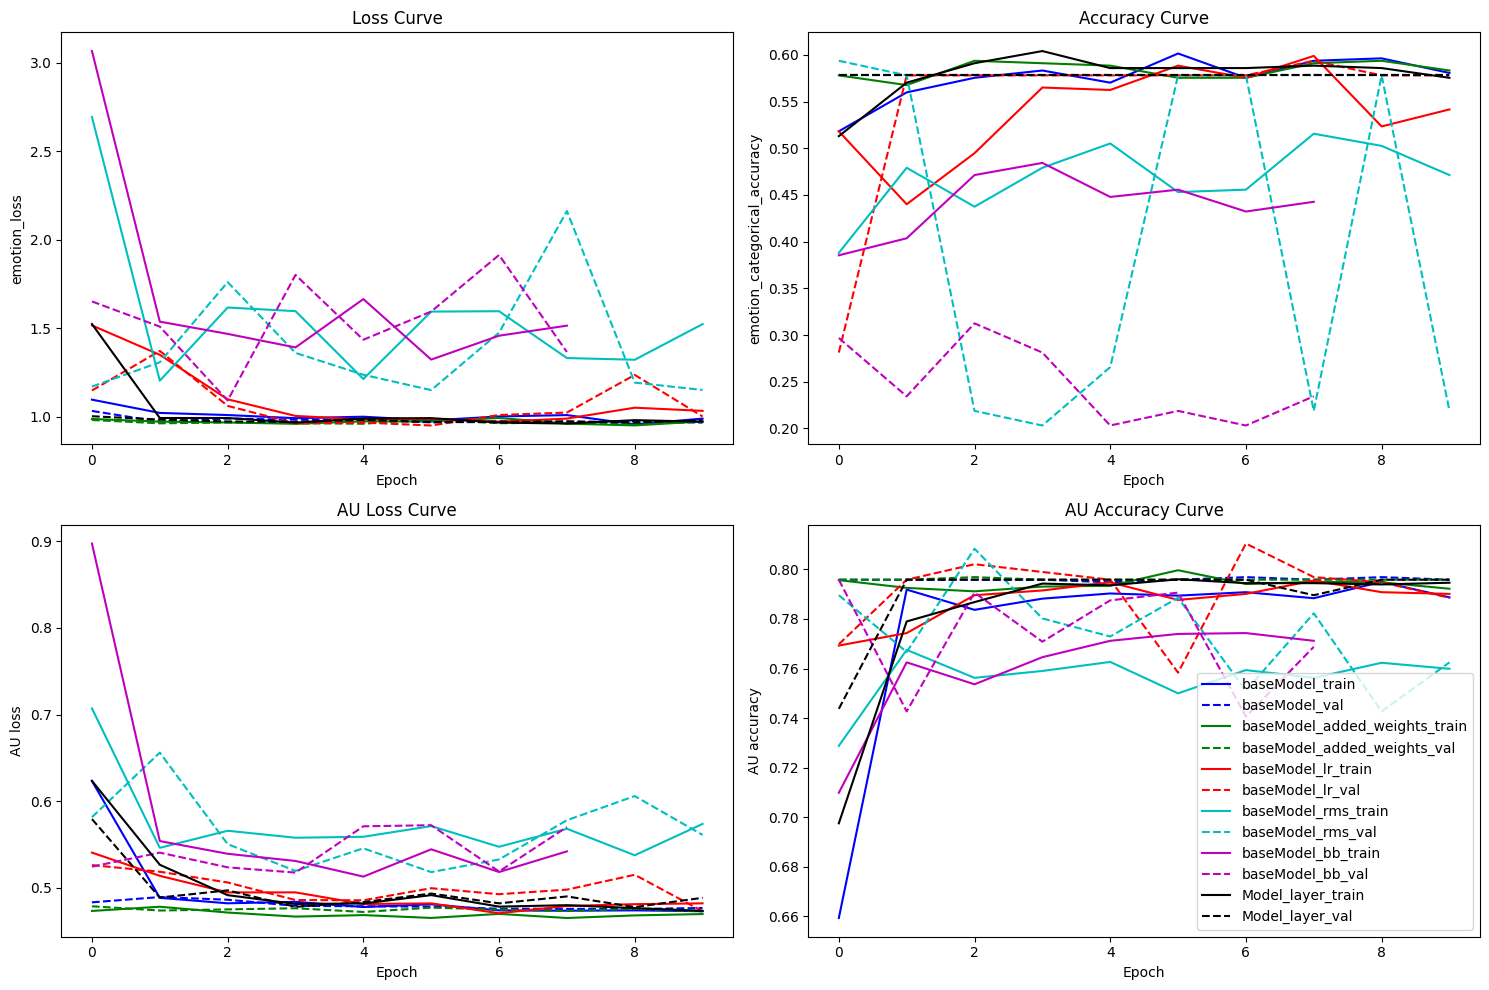

In [559]:
plot_curve(m_histories, loss_metric='emotion_loss', acc_metric='emotion_categorical_accuracy', ylim=[0.0, 1.0])

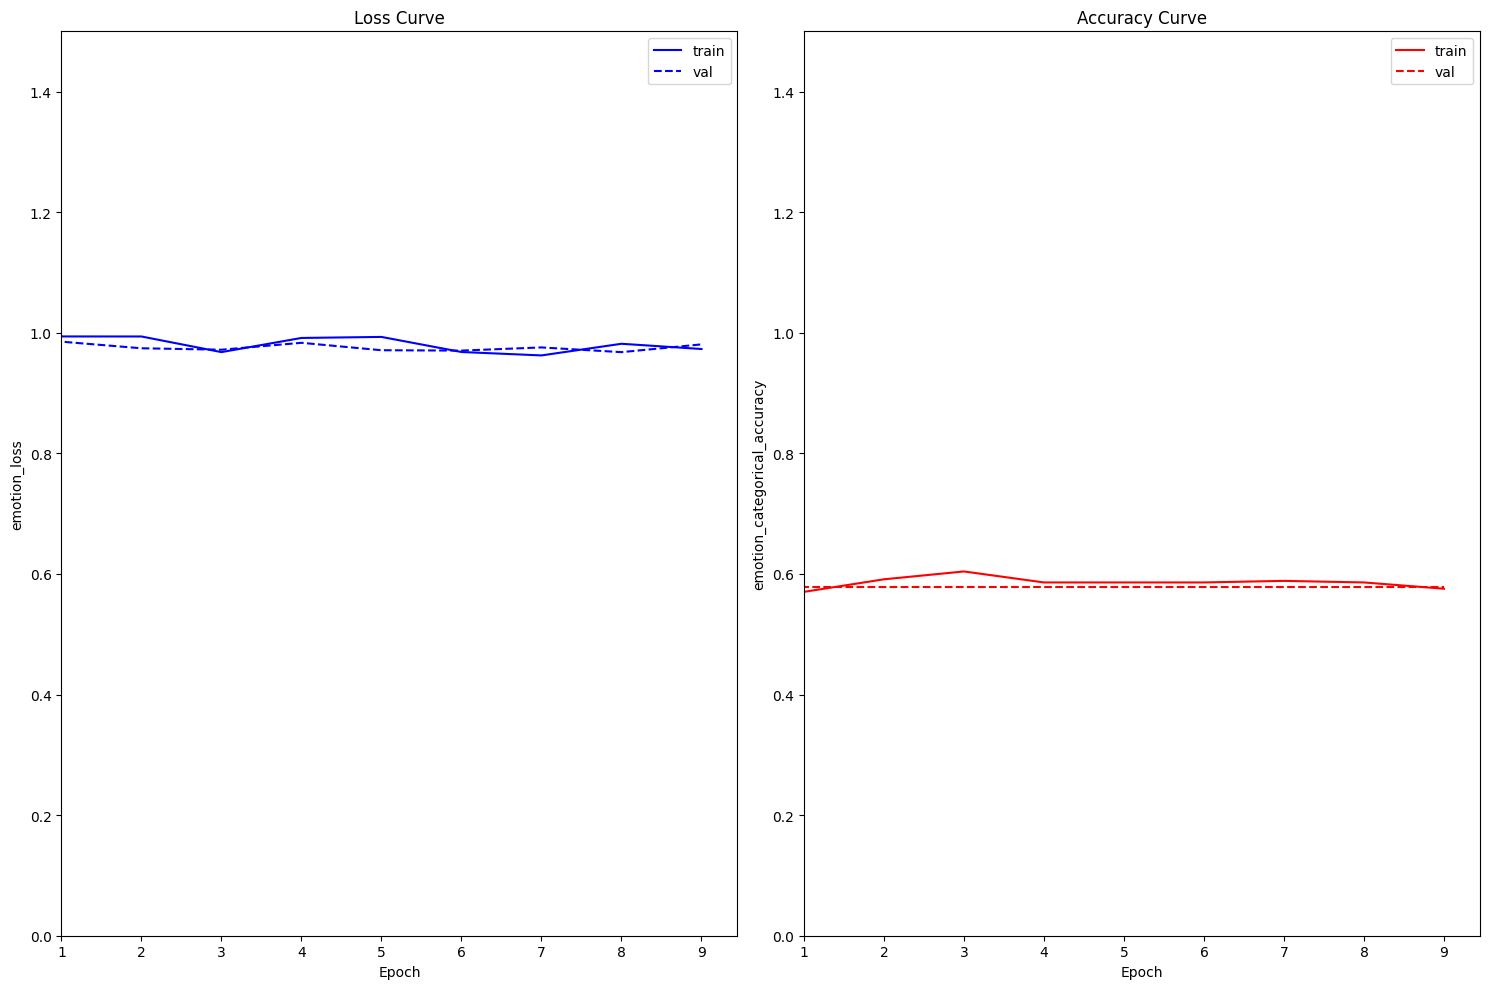

In [560]:
plot_single_curve(m_histories['Model_layer'], loss_metric='emotion_loss', acc_metric='emotion_categorical_accuracy', ylim=[0.0, 1.5])

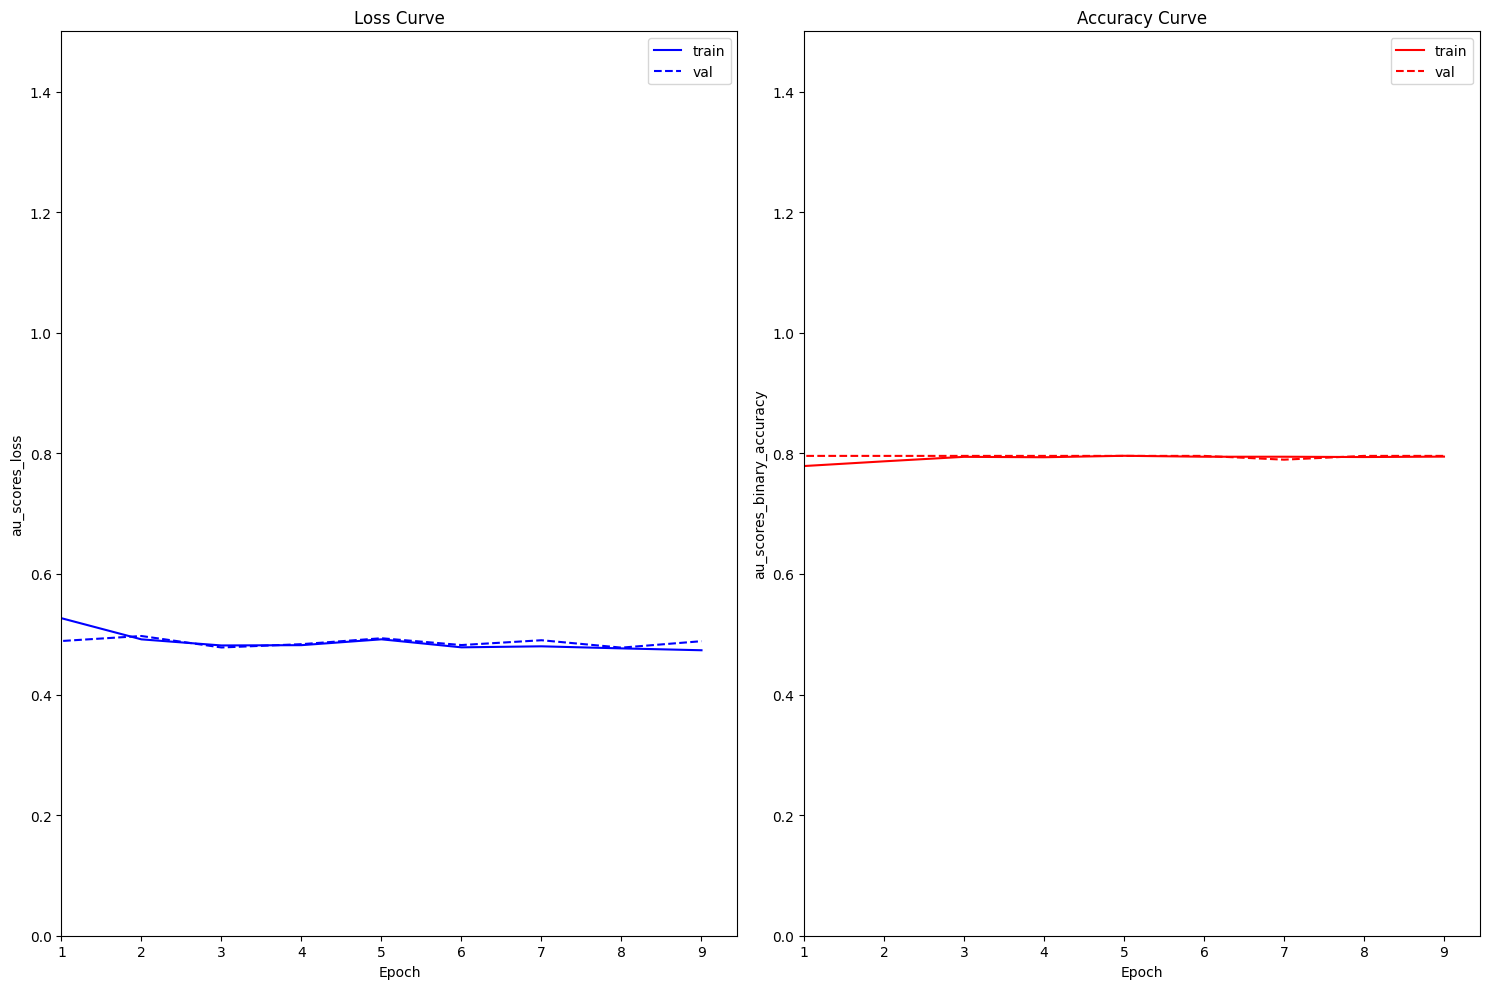

In [584]:
plot_single_curve(m_histories['Model_layer'], loss_metric='au_scores_loss', acc_metric='au_scores_binary_accuracy', ylim=[0.0, 1.5])

In [561]:


evaluation_results = model_res_d.evaluate(val_generator)

# Extract individual metric values for AU scores and emotion
au_scores_loss = evaluation_results[1]
emotion_loss = evaluation_results[2]
au_scores_binary_accuracy = evaluation_results[3]
au_scores_precision = evaluation_results[4]
au_scores_recall = evaluation_results[5]
au_scores_auc = evaluation_results[6]
emotion_categorical_accuracy = evaluation_results[7]
emotion_precision = evaluation_results[8]  # Add precision for emotion
emotion_recall = evaluation_results[9]  # Add recall for emotion
emotion_auc = evaluation_results[10]  # Add AUC for emotion
f1_score = 2 * (au_scores_precision * au_scores_recall) / (au_scores_precision + au_scores_recall)
emotion_f1_score = 2 * (emotion_precision * emotion_recall) / (emotion_precision + emotion_recall)

# Print the evaluation metrics
print(f"AU Scores Loss: {au_scores_loss:.4f}")
print(f"AU Scores Binary Accuracy: {au_scores_binary_accuracy:.4f}")
print(f"AU Scores Precision: {au_scores_precision:.4f}")
print(f"AU Scores Recall: {au_scores_recall:.4f}")
print(f"AU Scores AUC: {au_scores_auc:.4f}")
print(f"AU Scores F1 score: {f1_score:.4f}")

print(f"Emotion Loss: {emotion_loss:.4f}")
print(f"Emotion Categorical Accuracy: {emotion_categorical_accuracy:.4f}")
print(f"Emotion Precision: {emotion_precision:.4f}")
print(f"Emotion Recall: {emotion_recall:.4f}")
print(f"Emotion AUC: {emotion_auc:.4f}")
print(f"Emotion F1 score: {emotion_f1_score:.4f}")

2/2 [==============================] - 1s 368ms/step - loss: 4.9037 - au_scores_loss: 0.4885 - emotion_loss: 0.9808 - au_scores_binary_accuracy: 0.7958 - au_scores_precision_134: 0.5469 - au_scores_recall_134: 0.1733 - au_scores_auc_134: 0.6773 - emotion_categorical_accuracy: 0.5781 - emotion_precision_135: 0.6667 - emotion_recall_135: 0.3125 - emotion_auc_135: 0.7186
AU Scores Loss: 0.4885
AU Scores Binary Accuracy: 0.7958
AU Scores Precision: 0.5469
AU Scores Recall: 0.1733
AU Scores AUC: 0.6773
AU Scores F1 score: 0.2632
Emotion Loss: 0.9808
Emotion Categorical Accuracy: 0.5781
Emotion Precision: 0.6667
Emotion Recall: 0.3125
Emotion AUC: 0.7186
Emotion F1 score: 0.4255


## Result
* Adding a dense layer has improved the model in terms of high_level_emotion but little worse for AU scores
* lets try reducing units of the layer to 128 to try and find the balance between the two metrics

## Model 1.7 Adding Dense layer with units 128

In [562]:
inputs = tf.keras.Input(shape=IMG_SHAPE)
x = base_model_res(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)

# Separate output layers for AU scores and emotion
au_outputs = tf.keras.layers.Dense(len(au_columns), activation='sigmoid', name='au_scores')(x)
emotion_output = tf.keras.layers.Dense(3, activation='softmax', name='emotion')(x)

# List of output layers
output_layers = [au_outputs, emotion_output]

model_res_dd = tf.keras.Model(inputs=inputs, outputs=output_layers)
model_res_dd.summary()

Model: "model_35"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_45 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 resnet50 (Functional)          (None, 7, 7, 2048)   23587712    ['input_45[0][0]']               
                                                                                                  
 global_average_pooling2d_35 (G  (None, 2048)        0           ['resnet50[2][0]']               
 lobalAveragePooling2D)                                                                           
                                                                                           

In [563]:
from tensorflow.keras.metrics import BinaryAccuracy, CategoricalAccuracy, Precision, Recall, AUC
from tensorflow.keras.callbacks import ModelCheckpoint


precision = Precision()
recall = Recall()
auc = AUC()
emotion_precision = Precision()
emotion_recall = Recall()
emotion_auc = AUC()


learning_rate = 0.01

lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    learning_rate, decay_steps=1000, decay_rate=1, staircase=True
)

metrics = {
    'au_scores': [BinaryAccuracy(), precision, recall, auc],
    'emotion': [CategoricalAccuracy(), emotion_precision, emotion_recall,emotion_auc]
}
losses = {
    'au_scores': 'binary_crossentropy',
    'emotion': 'categorical_crossentropy'
}

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model_res_dd.compile(optimizer=optimizer, loss=losses,
                  loss_weights={'emotion': class_weights, 'au_scores': au_class_weights},
                  metrics=metrics)

epochs = 10
m_histories['Model_layer_128'] = model_res_dd.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    callbacks=get_callbacks('models/Model_layer_128'),
    verbose=1
)

Epoch 1/10
12/12 [==============================] - 25s 2s/step - loss: 11.1312 - au_scores_loss: 0.7311 - emotion_loss: 2.3266 - au_scores_binary_accuracy: 0.5944 - au_scores_precision_136: 0.2300 - au_scores_recall_136: 0.4018 - au_scores_auc_136: 0.5391 - emotion_categorical_accuracy: 0.4557 - emotion_precision_137: 0.4622 - emotion_recall_137: 0.4141 - emotion_auc_137: 0.5434 - val_loss: 5.1404 - val_au_scores_loss: 0.5932 - val_emotion_loss: 1.0066 - val_au_scores_binary_accuracy: 0.6438 - val_au_scores_precision_136: 0.1354 - val_au_scores_recall_136: 0.1287 - val_au_scores_auc_136: 0.5386 - val_emotion_categorical_accuracy: 0.5781 - val_emotion_precision_137: 0.5781 - val_emotion_recall_137: 0.5781 - val_emotion_auc_137: 0.6827
Epoch 2/10
12/12 [==============================] - 17s 1s/step - loss: 5.0395 - au_scores_loss: 0.5500 - emotion_loss: 0.9952 - au_scores_binary_accuracy: 0.7462 - au_scores_precision_136: 0.2859 - au_scores_recall_136: 0.1540 - au_scores_auc_136: 0.5904

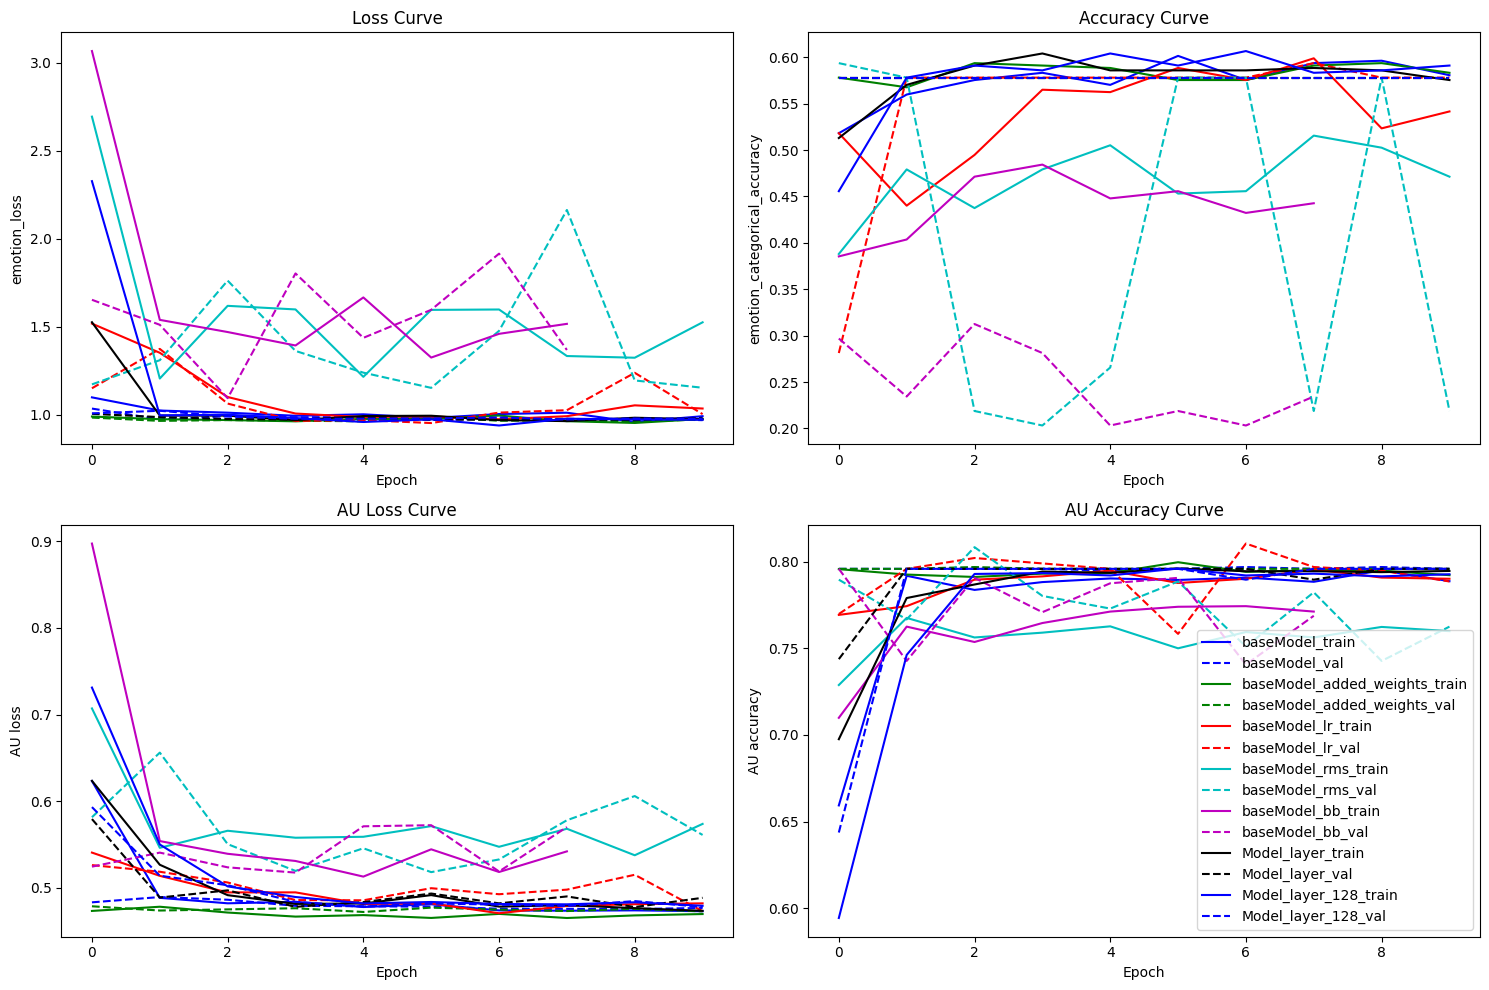

In [564]:
plot_curve(m_histories, loss_metric='emotion_loss', acc_metric='emotion_categorical_accuracy', ylim=[0.0, 1.0])

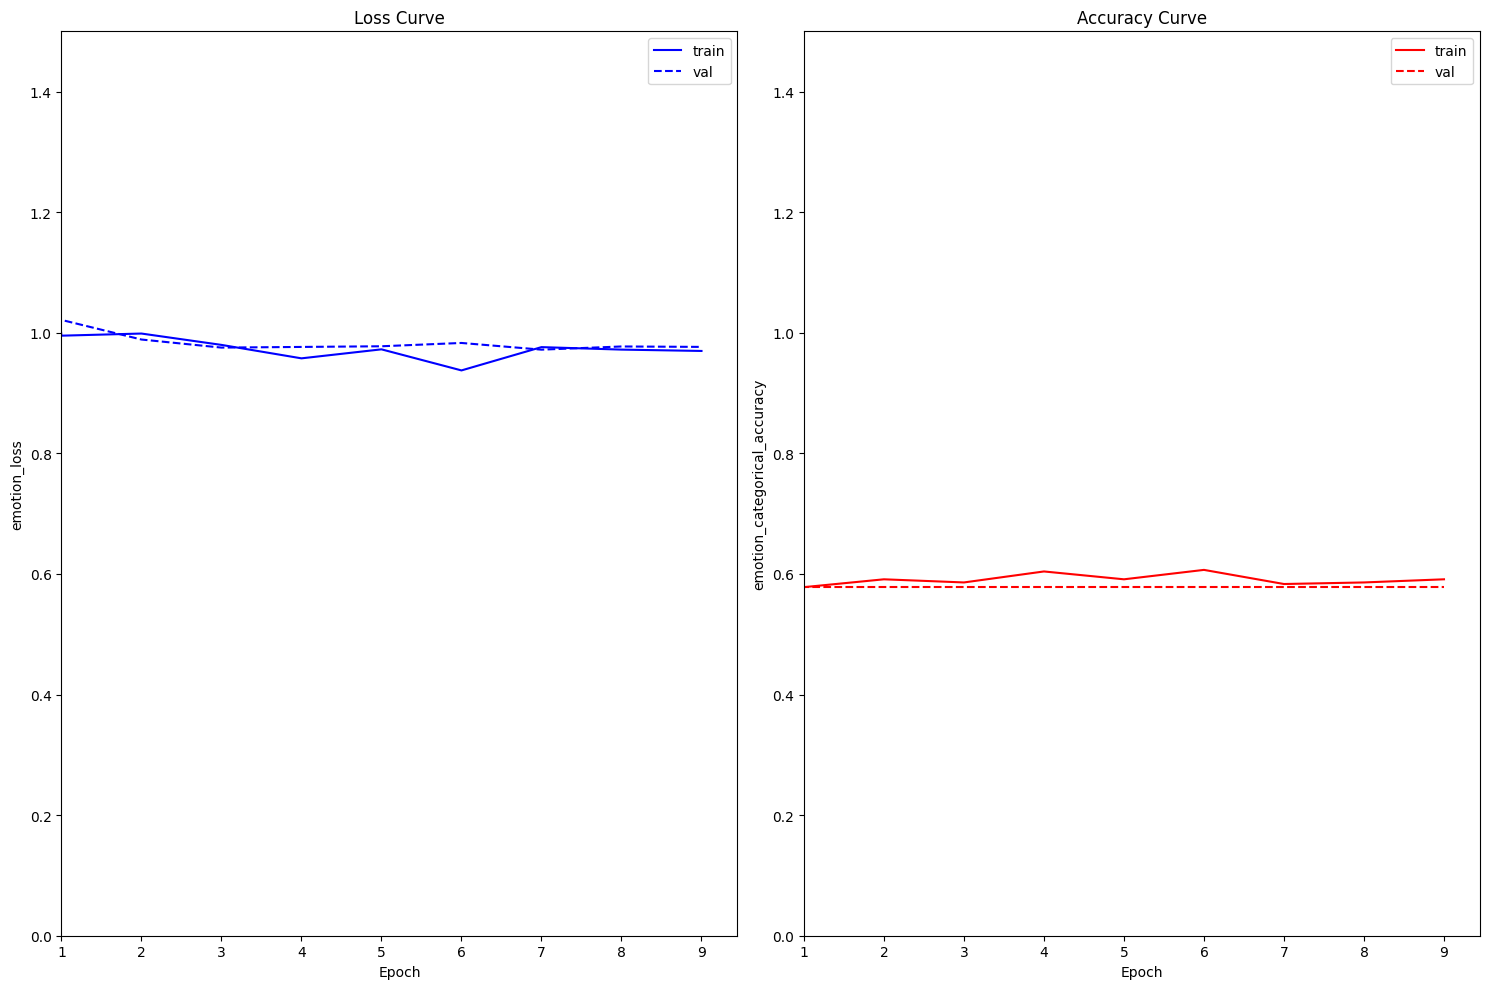

In [565]:
plot_single_curve(m_histories['Model_layer_128'], loss_metric='emotion_loss', acc_metric='emotion_categorical_accuracy', ylim=[0.0, 1.5])

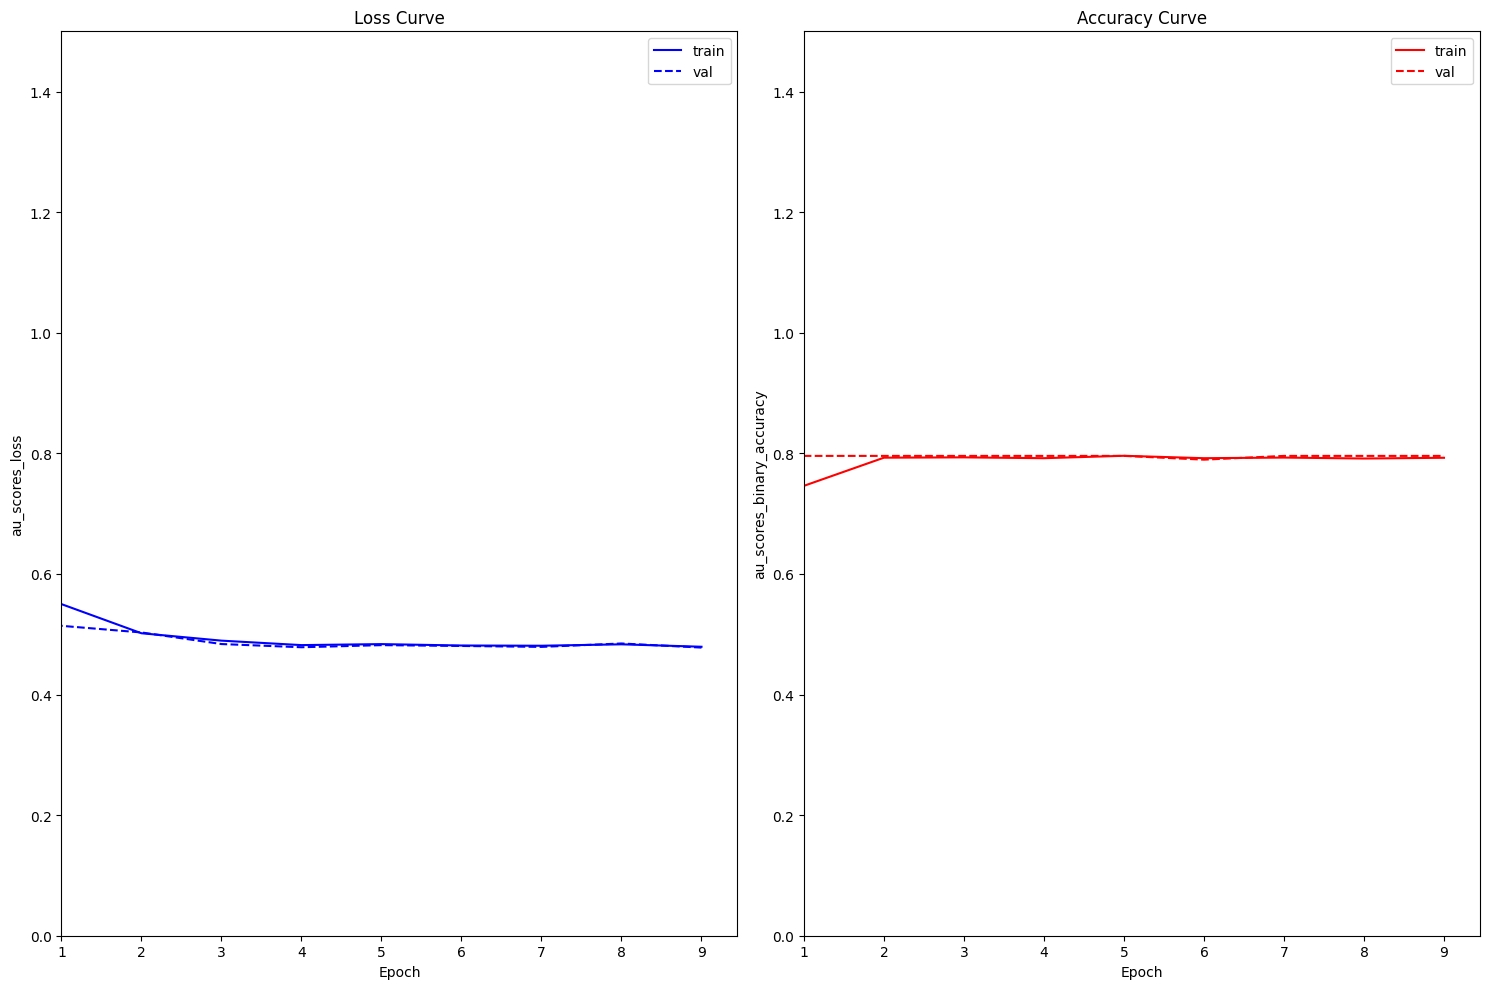

In [566]:
plot_single_curve(m_histories['Model_layer_128'], loss_metric='au_scores_loss', acc_metric='au_scores_binary_accuracy', ylim=[0.0, 1.5])

In [567]:
eval_results = model_res_dd.evaluate(val_generator)

au_scores_loss = evaluation_results[1]
emotion_loss = evaluation_results[2]
au_scores_binary_accuracy = evaluation_results[3]
au_scores_precision = evaluation_results[4]
au_scores_recall = evaluation_results[5]
au_scores_auc = evaluation_results[6]
emotion_categorical_accuracy = evaluation_results[7]
emotion_precision = evaluation_results[8]  # Add precision for emotion
emotion_recall = evaluation_results[9]  # Add recall for emotion
emotion_auc = evaluation_results[10]  # Add AUC for emotion
f1_score = 2 * (au_scores_precision * au_scores_recall) / (au_scores_precision + au_scores_recall)
emotion_f1_score = 2 * (emotion_precision * emotion_recall) / (emotion_precision + emotion_recall)

print(f"AU Scores Loss: {au_scores_loss:.4f}")
print(f"AU Scores Binary Accuracy: {au_scores_binary_accuracy:.4f}")
print(f"AU Scores Precision: {au_scores_precision:.4f}")
print(f"AU Scores Recall: {au_scores_recall:.4f}")
print(f"AU Scores AUC: {au_scores_auc:.4f}")
print(f"AU Scores F1 score: {f1_score:.4f}")

print(f"Emotion Loss: {emotion_loss:.4f}")
print(f"Emotion Categorical Accuracy: {emotion_categorical_accuracy:.4f}")
print(f"Emotion Precision: {emotion_precision:.4f}")
print(f"Emotion Recall: {emotion_recall:.4f}")
print(f"Emotion AUC: {emotion_auc:.4f}")
print(f"Emotion F1 score: {emotion_f1_score:.4f}")

2/2 [==============================] - 1s 385ms/step - loss: 4.8728 - au_scores_loss: 0.4779 - emotion_loss: 0.9766 - au_scores_binary_accuracy: 0.7958 - au_scores_precision_136: 0.5469 - au_scores_recall_136: 0.1733 - au_scores_auc_136: 0.6839 - emotion_categorical_accuracy: 0.5781 - emotion_precision_137: 0.5781 - emotion_recall_137: 0.5781 - emotion_auc_137: 0.6910
AU Scores Loss: 0.4779
AU Scores Binary Accuracy: 0.7958
AU Scores Precision: 0.5469
AU Scores Recall: 0.1733
AU Scores AUC: 0.6839
AU Scores F1 score: 0.2632
Emotion Loss: 0.9766
Emotion Categorical Accuracy: 0.5781
Emotion Precision: 0.5781
Emotion Recall: 0.5781
Emotion AUC: 0.6910
Emotion F1 score: 0.5781


## Result
* Model has slightly performed better with better AUC scores compared to previous model also the graph has become more stable
* Lets further reduce the units to find more balance between the output of the two tasks
* The Model seems to have a good fit

## Model 1.8 dense layer 64

In [568]:
inputs = tf.keras.Input(shape=IMG_SHAPE)
x = base_model_res(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)  # Regularize with dropout

# Separate output layers for AU scores and emotion
au_outputs = tf.keras.layers.Dense(len(au_columns), activation='sigmoid', name='au_scores')(x)
emotion_output = tf.keras.layers.Dense(3, activation='softmax', name='emotion')(x)

# List of output layers
output_layers = [au_outputs, emotion_output]

model_res_ddd = tf.keras.Model(inputs=inputs, outputs=output_layers)
model_res_ddd.summary()

Model: "model_36"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_46 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 resnet50 (Functional)          (None, 7, 7, 2048)   23587712    ['input_46[0][0]']               
                                                                                                  
 global_average_pooling2d_36 (G  (None, 2048)        0           ['resnet50[3][0]']               
 lobalAveragePooling2D)                                                                           
                                                                                           

In [569]:
from tensorflow.keras.metrics import BinaryAccuracy, CategoricalAccuracy, Precision, Recall, AUC
from tensorflow.keras.callbacks import ModelCheckpoint


precision = Precision()
recall = Recall()
auc = AUC()
emotion_precision = Precision()
emotion_recall = Recall()
emotion_auc = AUC()


learning_rate = 0.01

lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    learning_rate, decay_steps=1000, decay_rate=1, staircase=True
)

metrics = {
    'au_scores': [BinaryAccuracy(), precision, recall, auc],
    'emotion': [CategoricalAccuracy(), emotion_precision, emotion_recall,emotion_auc]
}
losses = {
    'au_scores': 'binary_crossentropy',
    'emotion': 'categorical_crossentropy'
}

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model_res_ddd.compile(optimizer=optimizer, loss=losses,
                  loss_weights={'emotion': class_weights, 'au_scores': au_class_weights},
                  metrics=metrics)

epochs = 10
m_histories['Model_layer_64'] = model_res_ddd.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    callbacks=get_callbacks('models/Model_layer_64'),
    verbose=1
)

Epoch 1/10
12/12 [==============================] - 25s 2s/step - loss: 6.0894 - au_scores_loss: 0.6176 - emotion_loss: 1.2150 - au_scores_binary_accuracy: 0.6799 - au_scores_precision_138: 0.2792 - au_scores_recall_138: 0.3417 - au_scores_auc_138: 0.5848 - emotion_categorical_accuracy: 0.5130 - emotion_precision_139: 0.5487 - emotion_recall_139: 0.4401 - emotion_auc_139: 0.6960 - val_loss: 5.0302 - val_au_scores_loss: 0.5412 - val_emotion_loss: 0.9954 - val_au_scores_binary_accuracy: 0.7646 - val_au_scores_precision_138: 0.3286 - val_au_scores_recall_138: 0.1139 - val_au_scores_auc_138: 0.6091 - val_emotion_categorical_accuracy: 0.5781 - val_emotion_precision_139: 0.5781 - val_emotion_recall_139: 0.5781 - val_emotion_auc_139: 0.7023
Epoch 2/10
12/12 [==============================] - 19s 2s/step - loss: 5.0459 - au_scores_loss: 0.5335 - emotion_loss: 1.0010 - au_scores_binary_accuracy: 0.7470 - au_scores_precision_138: 0.2412 - au_scores_recall_138: 0.0970 - au_scores_auc_138: 0.6038 

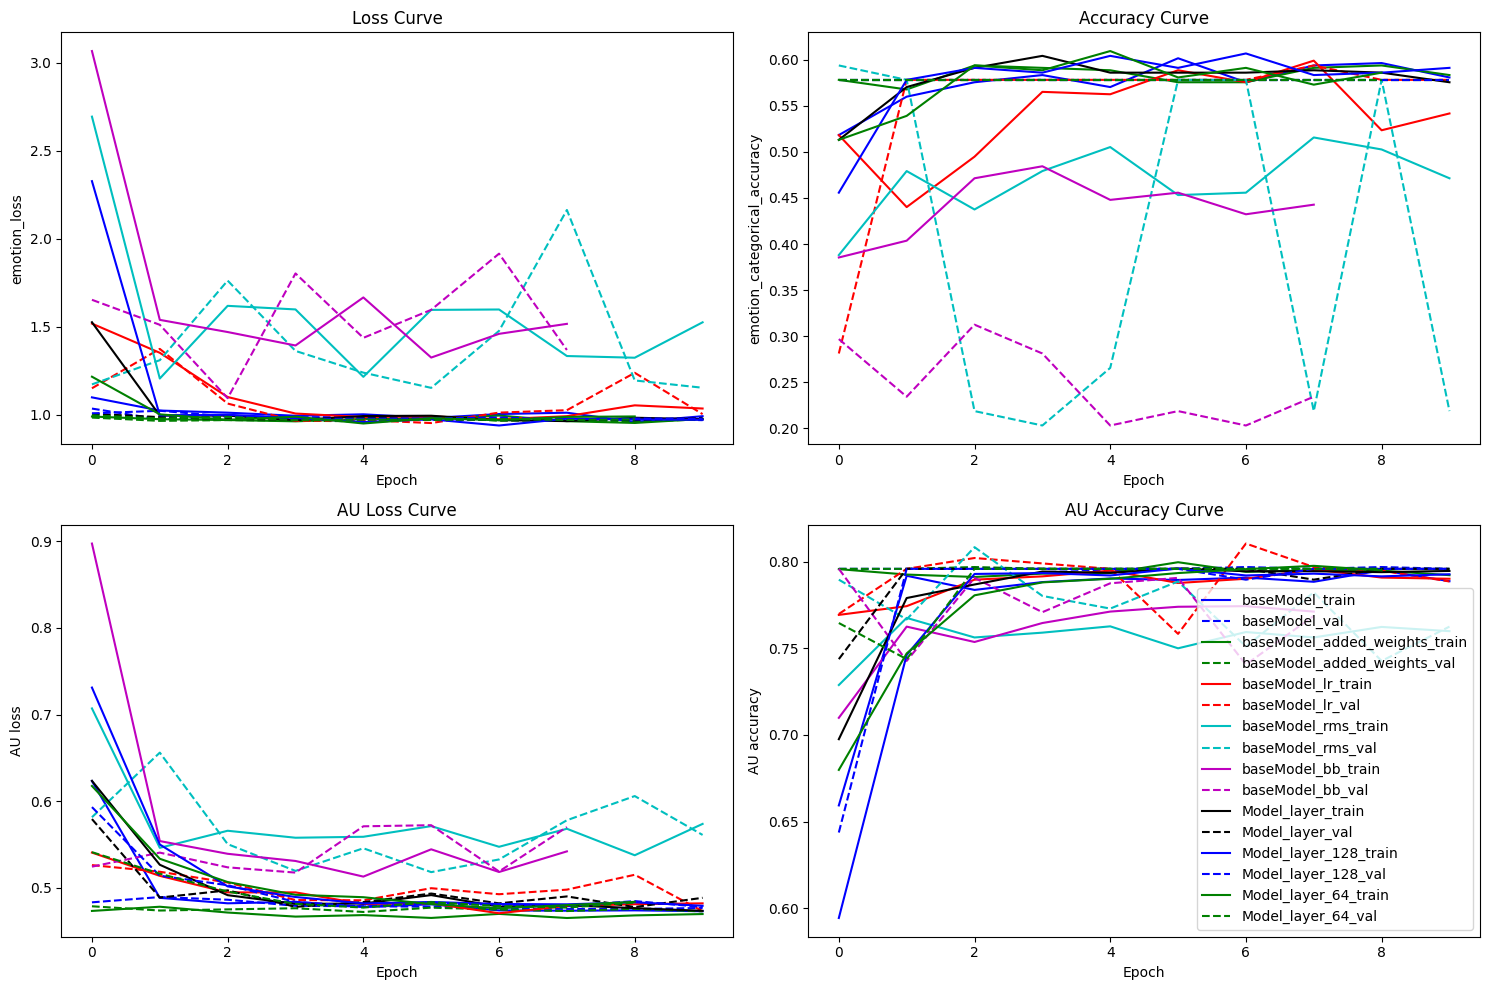

In [570]:
plot_curve(m_histories, loss_metric='emotion_loss', acc_metric='emotion_categorical_accuracy', ylim=[0.0, 1.0])

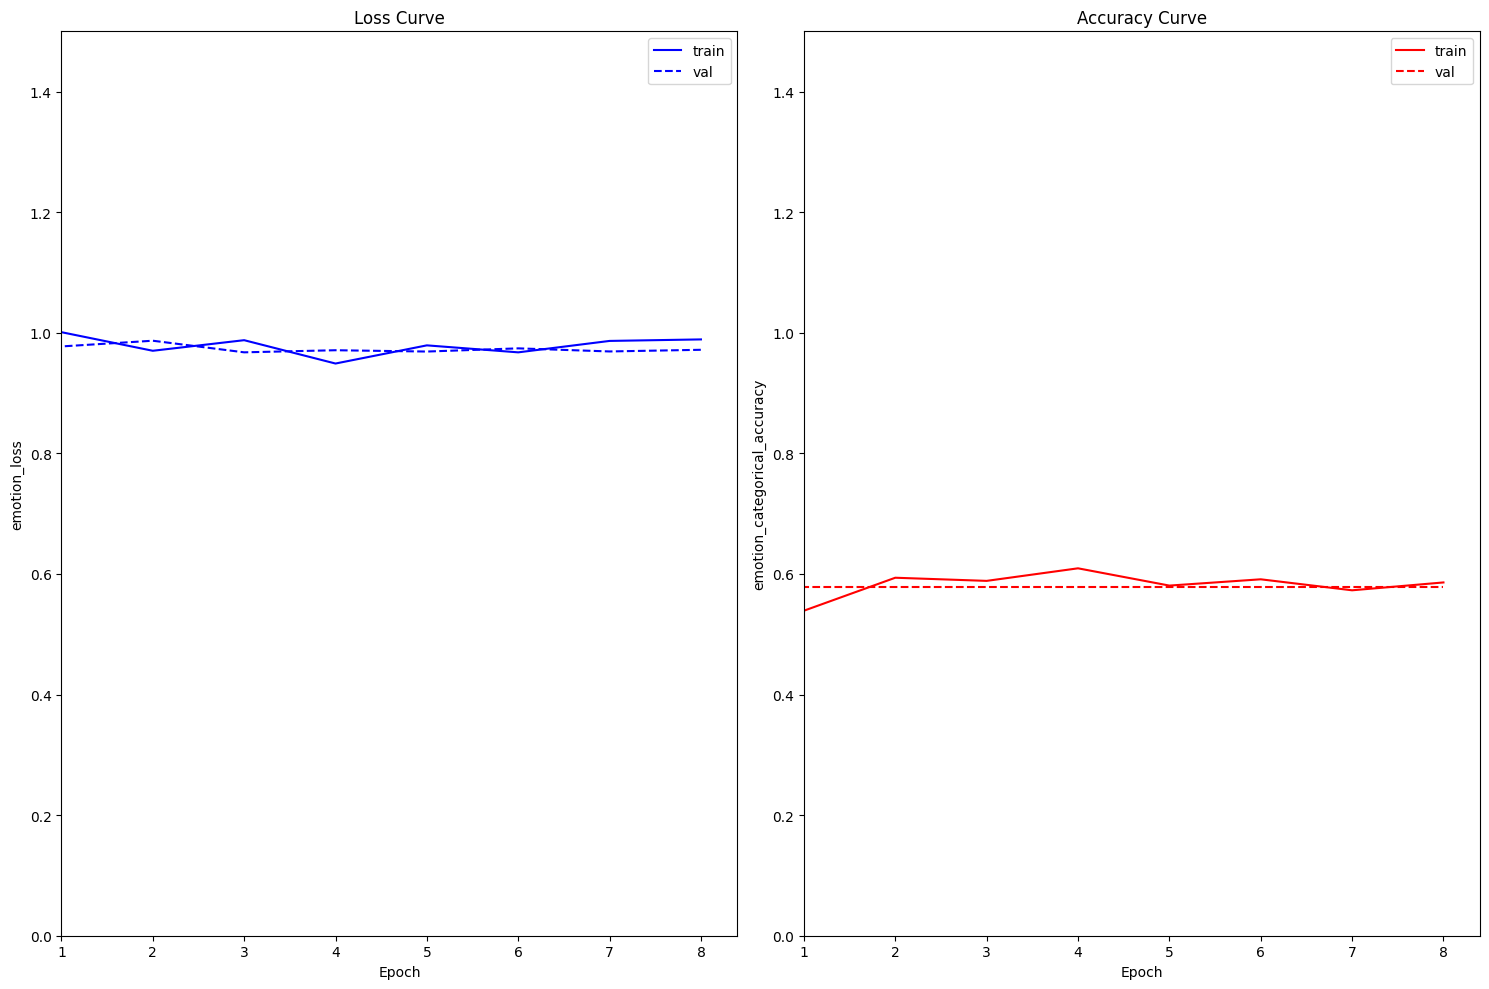

In [571]:
plot_single_curve(m_histories['Model_layer_64'], loss_metric='emotion_loss', acc_metric='emotion_categorical_accuracy', ylim=[0.0, 1.5])

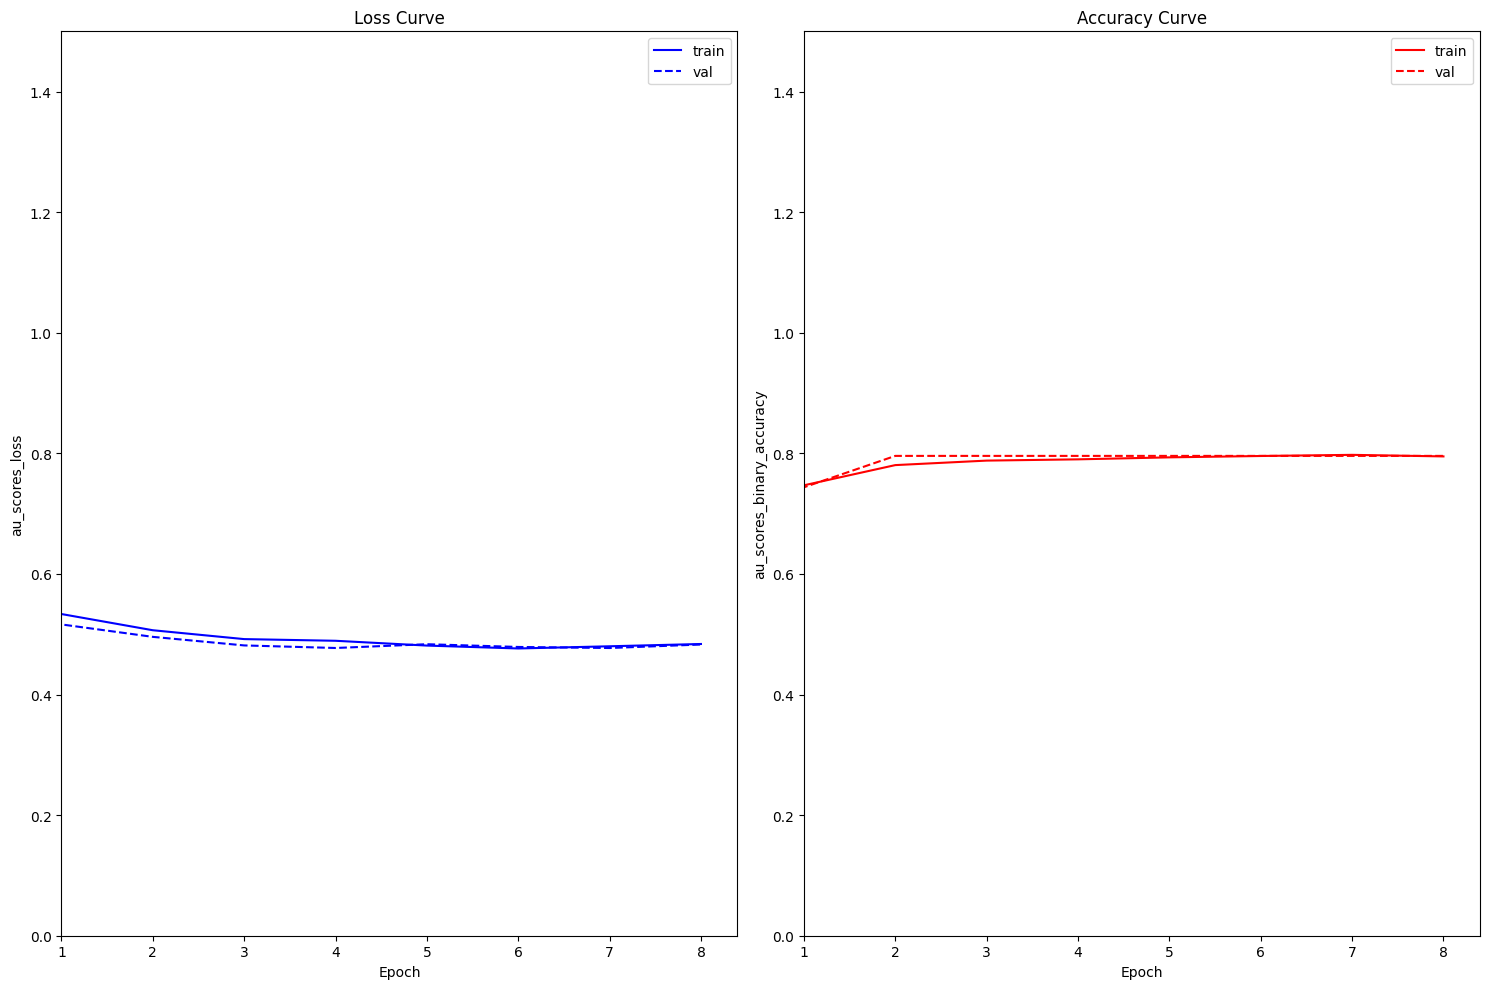

In [572]:
plot_single_curve(m_histories['Model_layer_64'], loss_metric='au_scores_loss', acc_metric='au_scores_binary_accuracy', ylim=[0.0, 1.5])

In [573]:
eval_results = model_res_ddd.evaluate(val_generator)


au_scores_loss = evaluation_results[1]
emotion_loss = evaluation_results[2]
au_scores_binary_accuracy = evaluation_results[3]
au_scores_precision = evaluation_results[4]
au_scores_recall = evaluation_results[5]
au_scores_auc = evaluation_results[6]
emotion_categorical_accuracy = evaluation_results[7]
emotion_precision = evaluation_results[8]  # Add precision for emotion
emotion_recall = evaluation_results[9]  # Add recall for emotion
emotion_auc = evaluation_results[10]  # Add AUC for emotion


# Print the evaluation metrics
print(f"AU Scores Loss: {au_scores_loss:.4f}")
print(f"AU Scores Binary Accuracy: {au_scores_binary_accuracy:.4f}")
print(f"AU Scores Precision: {au_scores_precision:.4f}")
print(f"AU Scores Recall: {au_scores_recall:.4f}")
print(f"AU Scores AUC: {au_scores_auc:.4f}")

print(f"Emotion Loss: {emotion_loss:.4f}")
print(f"Emotion Categorical Accuracy: {emotion_categorical_accuracy:.4f}")
print(f"Emotion Precision: {emotion_precision:.4f}")
print(f"Emotion Recall: {emotion_recall:.4f}")
print(f"Emotion AUC: {emotion_auc:.4f}")


2/2 [==============================] - 1s 374ms/step - loss: 4.8373 - au_scores_loss: 0.4815 - emotion_loss: 0.9676 - au_scores_binary_accuracy: 0.7958 - au_scores_precision_138: 0.5469 - au_scores_recall_138: 0.1733 - au_scores_auc_138: 0.6730 - emotion_categorical_accuracy: 0.5781 - emotion_precision_139: 0.5781 - emotion_recall_139: 0.5781 - emotion_auc_139: 0.7353
AU Scores Loss: 0.4815
AU Scores Binary Accuracy: 0.7958
AU Scores Precision: 0.5469
AU Scores Recall: 0.1733
AU Scores AUC: 0.6730
Emotion Loss: 0.9676
Emotion Categorical Accuracy: 0.5781
Emotion Precision: 0.5781
Emotion Recall: 0.5781
Emotion AUC: 0.7353


## Result
* The model is too similar to the layer with units of 128 so let us stick with the previous model
* The model does not show any sign of overfitting and is a good fit
* Fine tuning the resnet model to see if the performance improves

## Model 1.9 Fine Tuning the resnet50 model

In [585]:
from tensorflow.keras.metrics import BinaryAccuracy, CategoricalAccuracy, Precision, Recall, AUC
from tensorflow.keras.callbacks import ModelCheckpoint


precision = Precision()
recall = Recall()
auc = AUC()
emotion_precision = Precision()
emotion_recall = Recall()
emotion_auc = AUC()

base_model_res.trainable = True

# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model_res.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model_res.layers[:fine_tune_at]:
  layer.trainable =  False

inputs = tf.keras.Input(shape=IMG_SHAPE)
x = base_model_res(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)

au_outputs = tf.keras.layers.Dense(len(au_columns), activation='sigmoid', name='au_scores')(x)
emotion_output = tf.keras.layers.Dense(3, activation='softmax', name='emotion')(x)

output_layers = [au_outputs, emotion_output]

model_res_fine_tune = tf.keras.Model(inputs=inputs, outputs=output_layers)


model_res_fine_tune.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                            loss={'au_scores': 'binary_crossentropy', 'emotion': 'categorical_crossentropy'},
                            loss_weights={'au_scores': au_class_weights, 'emotion': class_weights},
                            metrics={'au_scores': [BinaryAccuracy(), precision, recall, auc],'emotion': [CategoricalAccuracy(), emotion_precision, emotion_recall,emotion_auc]})


epochs = 10
m_histories['fine_tune'] = model_res_fine_tune.fit(train_generator,
                                             epochs=epochs,
                                             validation_data=val_generator,
                                             callbacks=get_callbacks('models/fine_tune'),
                                             verbose=1)






Number of layers in the base model:  175
Epoch 1/10
12/12 [==============================] - 43s 2s/step - loss: 5.5065 - au_scores_loss: 0.6719 - emotion_loss: 1.0686 - au_scores_binary_accuracy: 0.6144 - au_scores_precision_142: 0.2637 - au_scores_recall_142: 0.4766 - au_scores_auc_142: 0.5695 - emotion_categorical_accuracy: 0.5339 - emotion_precision_143: 0.5385 - emotion_recall_143: 0.4557 - emotion_auc_143: 0.6509 - val_loss: 5.1540 - val_au_scores_loss: 0.6026 - val_emotion_loss: 1.0072 - val_au_scores_binary_accuracy: 0.7750 - val_au_scores_precision_142: 0.4453 - val_au_scores_recall_142: 0.2822 - val_au_scores_auc_142: 0.6467 - val_emotion_categorical_accuracy: 0.5781 - val_emotion_precision_143: 0.5781 - val_emotion_recall_143: 0.5781 - val_emotion_auc_143: 0.6797
Epoch 2/10
12/12 [==============================] - 18s 2s/step - loss: 5.0348 - au_scores_loss: 0.5679 - emotion_loss: 0.9894 - au_scores_binary_accuracy: 0.7517 - au_scores_precision_142: 0.3368 - au_scores_recall

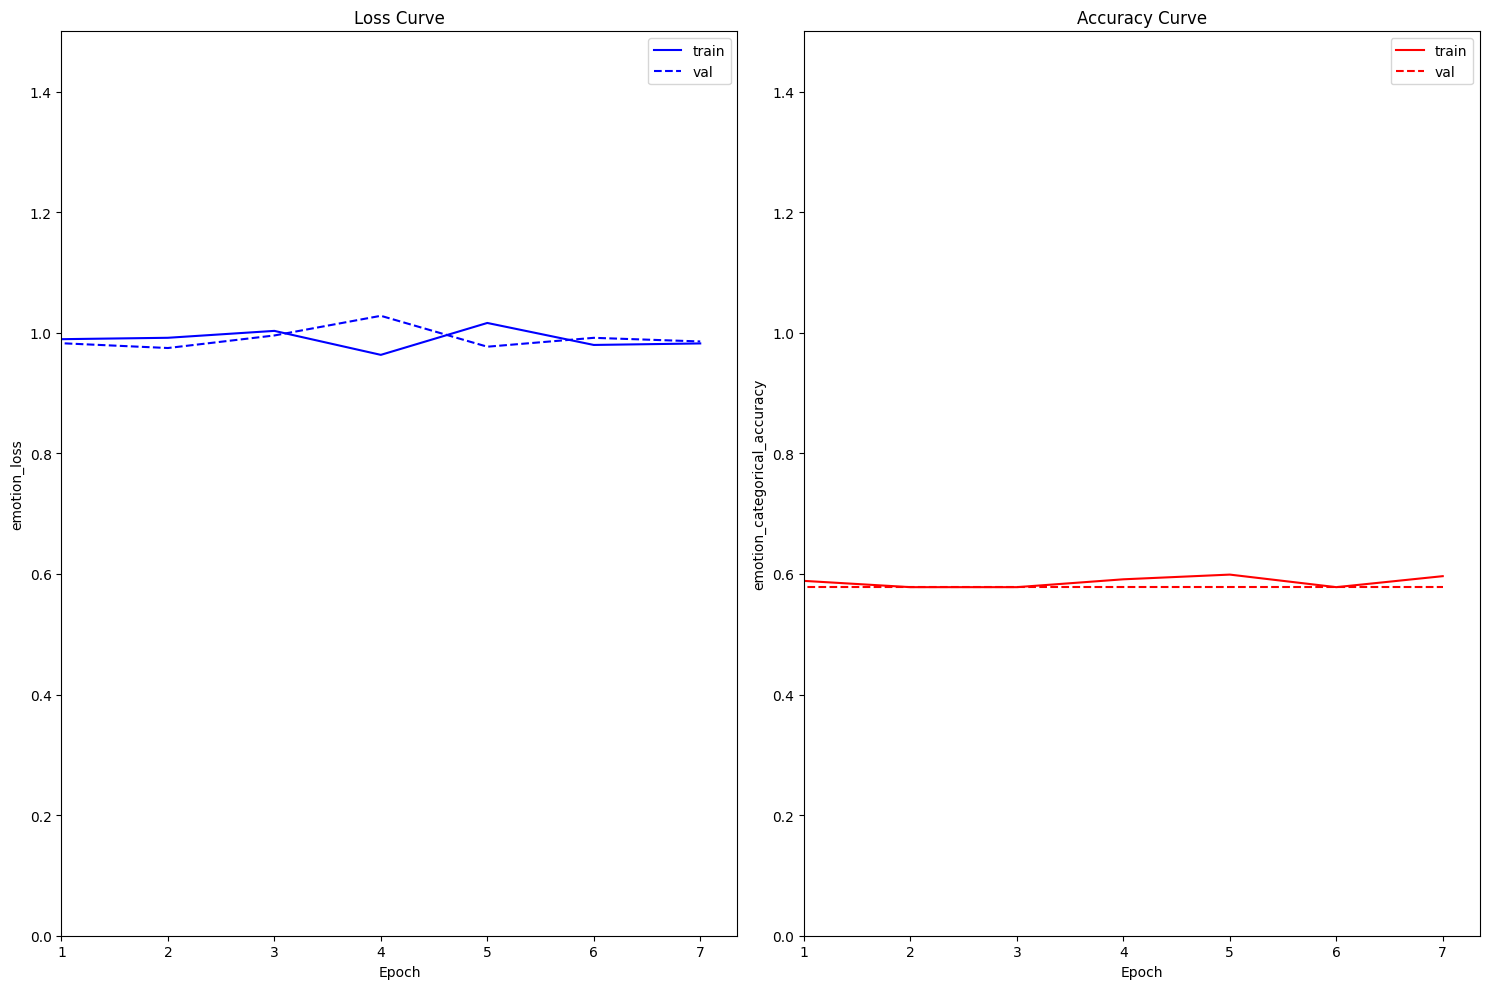

In [586]:
plot_single_curve(m_histories['fine_tune'], loss_metric='emotion_loss', acc_metric='emotion_categorical_accuracy', ylim=[0.0, 1.5])

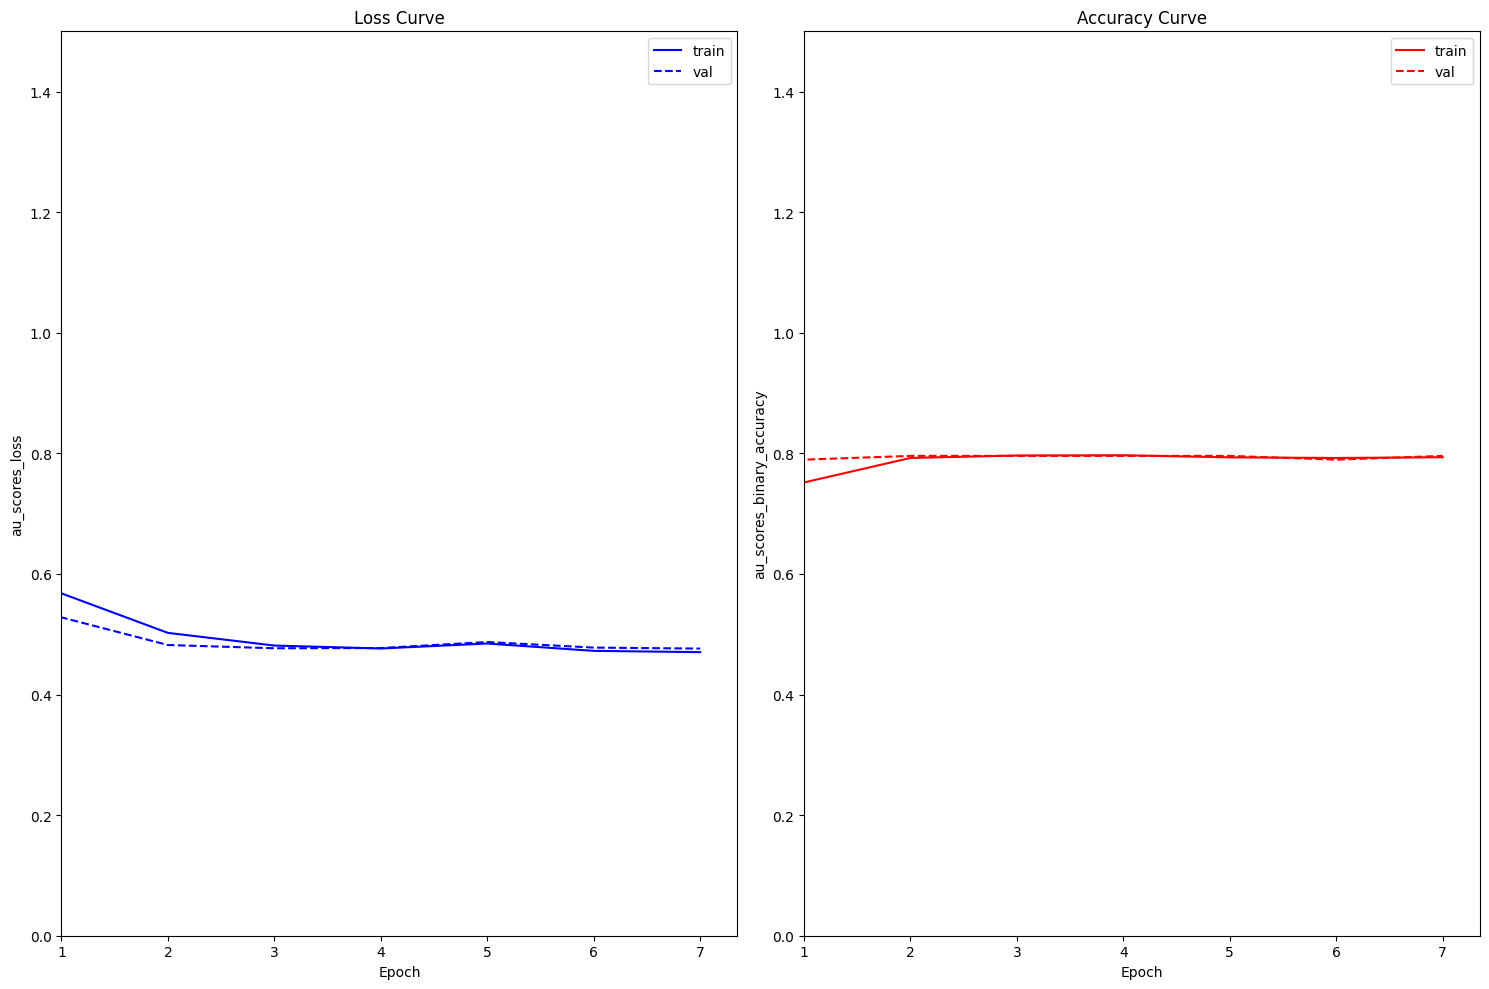

In [587]:
plot_single_curve(m_histories['fine_tune'], loss_metric='au_scores_loss', acc_metric='au_scores_binary_accuracy', ylim=[0.0, 1.5])

In [589]:

evaluation_results = model_res_fine_tune.evaluate(val_generator)

# Extract individual metric values for AU scores and emotion
au_scores_loss = evaluation_results[1]
emotion_loss = evaluation_results[2]
au_scores_binary_accuracy = evaluation_results[3]
au_scores_precision = evaluation_results[4]
au_scores_recall = evaluation_results[5]
au_scores_auc = evaluation_results[6]
emotion_categorical_accuracy = evaluation_results[7]
emotion_precision = evaluation_results[8]  # Add precision for emotion
emotion_recall = evaluation_results[9]  # Add recall for emotion
emotion_auc = evaluation_results[10]  # Add AUC for emotion
f1_score = 2 * (au_scores_precision * au_scores_recall) / (au_scores_precision + au_scores_recall)
emotion_f1_score = 2 * (emotion_precision * emotion_recall) / (emotion_precision + emotion_recall)

# Print the evaluation metrics
print(f"AU Scores Loss: {au_scores_loss:.4f}")
print(f"AU Scores Binary Accuracy: {au_scores_binary_accuracy:.4f}")
print(f"AU Scores Precision: {au_scores_precision:.4f}")
print(f"AU Scores Recall: {au_scores_recall:.4f}")
print(f"AU Scores AUC: {au_scores_auc:.4f}")
print(f"AU Scores F1 score: {f1_score:.4f}")

print(f"Emotion Loss: {emotion_loss:.4f}")
print(f"Emotion Categorical Accuracy: {emotion_categorical_accuracy:.4f}")
print(f"Emotion Precision: {emotion_precision:.4f}")
print(f"Emotion Recall: {emotion_recall:.4f}")
print(f"Emotion AUC: {emotion_auc:.4f}")
print(f"Emotion F1 score: {emotion_f1_score:.4f}")

2/2 [==============================] - 2s 1s/step - loss: 4.8697 - au_scores_loss: 0.4822 - emotion_loss: 0.9748 - au_scores_binary_accuracy: 0.7958 - au_scores_precision_142: 0.5469 - au_scores_recall_142: 0.1733 - au_scores_auc_142: 0.6628 - emotion_categorical_accuracy: 0.5781 - emotion_precision_143: 0.5781 - emotion_recall_143: 0.5781 - emotion_auc_143: 0.6713
AU Scores Loss: 0.4822
AU Scores Binary Accuracy: 0.7958
AU Scores Precision: 0.5469
AU Scores Recall: 0.1733
AU Scores AUC: 0.6628
AU Scores F1 score: 0.2632
Emotion Loss: 0.9748
Emotion Categorical Accuracy: 0.5781
Emotion Precision: 0.5781
Emotion Recall: 0.5781
Emotion AUC: 0.6713
Emotion F1 score: 0.5781


## Result
* Fine tuning the model also lead to very similar results to the model with a dense layer
* So going forward with model with dense layer 128 as the final model

## Evaluating the selected Model With layer 128

In [578]:

test_generator = DataGenerator(data_frame=test_df, batch_size=batch_size, dim=(224, 224, 3),
                                   n_emoclasses=3, data_mean=data_mean, data_std=data_std,
                                   data_prefix=prefix, shuffle=False, Augment=False)

In [582]:
evaluation_results=model_res_d.evaluate(test_generator)

1/1 [==============================] - 1s 1s/step - loss: 5.1509 - au_scores_loss: 0.5191 - emotion_loss: 1.0287 - au_scores_binary_accuracy: 0.7781 - au_scores_precision_134: 0.5156 - au_scores_recall_134: 0.1535 - au_scores_auc_134: 0.6634 - emotion_categorical_accuracy: 0.5156 - emotion_precision_135: 0.5156 - emotion_recall_135: 0.5156 - emotion_auc_135: 0.6424


In [583]:
au_scores_loss = evaluation_results[1]
emotion_loss = evaluation_results[2]
au_scores_binary_accuracy = evaluation_results[3]
au_scores_precision = evaluation_results[4]
au_scores_recall = evaluation_results[5]
au_scores_auc = evaluation_results[6]
emotion_categorical_accuracy = evaluation_results[7]
emotion_precision = evaluation_results[8]  # Add precision for emotion
emotion_recall = evaluation_results[9]  # Add recall for emotion
emotion_auc = evaluation_results[10]  # Add AUC for emotion
f1_score = 2 * (au_scores_precision * au_scores_recall) / (au_scores_precision + au_scores_recall)
emotion_f1_score = 2 * (emotion_precision * emotion_recall) / (emotion_precision + emotion_recall)

# Print the evaluation metrics
print(f"AU Scores Loss: {au_scores_loss:.4f}")
print(f"AU Scores Binary Accuracy: {au_scores_binary_accuracy:.4f}")
print(f"AU Scores Precision: {au_scores_precision:.4f}")
print(f"AU Scores Recall: {au_scores_recall:.4f}")
print(f"AU Scores AUC: {au_scores_auc:.4f}")
print(f"AU Scores F1 score: {f1_score:.4f}")

print(f"Emotion Loss: {emotion_loss:.4f}")
print(f"Emotion Categorical Accuracy: {emotion_categorical_accuracy:.4f}")
print(f"Emotion Precision: {emotion_precision:.4f}")
print(f"Emotion Recall: {emotion_recall:.4f}")
print(f"Emotion AUC: {emotion_auc:.4f}")
print(f"Emotion F1 score: {emotion_f1_score:.4f}")

AU Scores Loss: 0.5191
AU Scores Binary Accuracy: 0.7781
AU Scores Precision: 0.5156
AU Scores Recall: 0.1535
AU Scores AUC: 0.6634
AU Scores F1 score: 0.2366
Emotion Loss: 1.0287
Emotion Categorical Accuracy: 0.5156
Emotion Precision: 0.5156
Emotion Recall: 0.5156
Emotion AUC: 0.6424
Emotion F1 score: 0.5156


## References
[1] F. M. Salman and S. S. Abu-Naser, "Classification of Real and Fake Human Faces Using Deep Learning," International Journal of Academic Engineering Research (IJAER), vol. 6, no. 3, pp. 1-14, March 2022. ISSN: 2643-9085.